# Setup

In [ ]:
# Core Data Science Imports
import numpy as np
import pandas as pd

# Statistical Modeling (statsmodels)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Visualization
import matplotlib.pyplot as plt

# Configuration/Styles
plt.style.use('fivethirtyeight')

**1. Core Data Science Imports:**

*   `import numpy as np`:  Imports the NumPy library and gives it the alias `np`. NumPy is fundamental for numerical operations in Python. It provides support for arrays, matrices, mathematical functions, etc.
*   `import pandas as pd`: Imports the Pandas library and aliases it as `pd`. Pandas is built on top of NumPy and provides data structures like DataFrames (tables) that are excellent for data manipulation, cleaning, and analysis.

**2. Statistical Modeling (statsmodels):**

This section imports tools specifically designed for statistical modeling, with a focus on time series:

*   `from statsmodels.graphics.tsaplots import plot_acf, plot_pacf`: Imports two functions from the `statsmodels.graphics.tsaplots` module:
    *   `plot_acf(x)`:  Plots the **Autocorrelation Function (ACF)** of a time series `x`. The ACF shows how strongly correlated a time series is with its past values at different lags. It's crucial for identifying patterns like seasonality and determining appropriate model orders (e.g. in ARIMA models).
    *   `plot_pacf(x)`: Plots the **Partial Autocorrelation Function (PACF)** of a time series `x`. The PACF shows the correlation between a time series and its lags, *removing* the effects of intermediate lags.  This helps identify direct relationships and is also important for model order selection.
*   `from statsmodels.tsa.seasonal import seasonal_decompose`: Imports the `seasonal_decompose` function. This function decomposes a time series into three components:
    *   **Trend:** The long-term direction of the data.
    *   **Seasonality:**  Repeating patterns at fixed intervals (e.g., yearly, monthly).
    *   **Residuals:** The remaining random variation after removing trend and seasonality.  Decomposition is useful for understanding the underlying structure of a time series and can help with forecasting.
*   `from statsmodels.tsa.stattools import adfuller`: Imports the `adfuller` function, which performs the **Augmented Dickey-Fuller (ADF) test**. This is a statistical test used to determine if a time series is stationary.  Stationarity is an important assumption for many time series models; non-stationary data often needs to be transformed before modeling.

**3. Visualization:**

*   `import matplotlib.pyplot as plt`: Imports the Matplotlib library's `pyplot` module and aliases it as `plt`. Matplotlib is a widely used plotting library in Python, allowing you to create various types of charts and graphs.

**4. Configuration/Styles:**

*   `plt.style.use('fivethirtyeight')`:  Sets the default style for Matplotlib plots to 'fivethirtyeight'. This style is known for its clean, visually appealing aesthetic often used in data journalism (by FiveThirtyEight). It changes things like color palettes, font sizes, and gridlines to create a specific look.

In [34]:
class CFG:
    data_folder = './data/'
    img_dim1 = 20
    img_dim2 = 10

# Adjust parameters for displayed figures
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

This code defines a configuration class `CFG` and then uses its attributes to adjust the default size of plots created with Matplotlib.  

**1. Class Definition:**

*   `class CFG:`: This defines a class named `CFG`.  Classes are blueprints for creating objects. In this case, `CFG` is used to hold configuration parameters related to the project. It's a common practice in Python projects to group related settings into a dedicated configuration object.
*   `data_folder = './data/'`: This defines an attribute of the `CFG` class called `data_folder`.  It stores the path to the directory where data files are located. The `./data/` means "a folder named 'data' in the current working directory."
*   `img_dim1 = 20`: Defines an attribute `img_dim1`, representing the desired width of images or figures (in this context, plots we will for visualization).  The value is set to 20.
*   `img_dim2 = 10`: Defines an attribute `img_dim2`, representing the desired height of images or figures. The value is set to 10.

**2. Adjusting Plot Size:**

*   `plt.rcParams`: This accesses the runtime configuration parameters of Matplotlib.  `rcParams` is a dictionary-like object that controls various aspects of how plots are rendered (colors, fonts, line styles, figure sizes, etc.).
*   `.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})`: This updates the dictionary with a new value:
    *   `'figure.figsize'`:  This key specifies the default size of figures created using Matplotlib. It expects a tuple representing (width, height) in inches.
    *   `(CFG.img_dim1, CFG.img_dim2)`: This provides the new figure size as a tuple.  It uses the values stored in the `img_dim1` and `img_dim2` attributes of the `CFG` class (which are 20 and 10 respectively).

# Functions

In [35]:
def print_adf_result(data, name="Series"):
    # Handle NaN values automatically for differenced data
    data = data.dropna()
    result = adfuller(data)
    print(f'\n--- ADF Test: {name} ---')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

This Python function `print_adf_result` performs the Augmented Dickey-Fuller (ADF) test on a given time series and prints the formatted results.

**1. Handling Missing Values:**


*   `data = data.dropna()`: This line handles potential missing values (NaN - Not a Number) in the input `data`.  The `.dropna()` method removes any rows or elements containing NaN values from the time series. This is important because the ADF test cannot handle missing data directly. It's particularly useful when you've previously differenced the data, as differencing can introduce NaNs at the beginning of the series.

**2. Performing the ADF Test:**

*   `result = adfuller(data)`: This is where the core ADF test is performed.  The `adfuller()` function (imported from `statsmodels.tsa.stattools`) takes the time series data as input and returns a tuple containing various statistics related to the test.

**3. Printing the Results:**

*   `print(f'\n--- ADF Test: {name} ---')`: Prints a header indicating that the following output is from the ADF test for the specified time series name. The `\n` adds an empty line before the header for better readability.
*   `print(f'ADF Statistic: {result[0]:.6f}')`:  Prints the ADF statistic (the test statistic). `result[0]` accesses the first element of the `result` tuple, which is the ADF statistic. The `:.6f` format specifier ensures that the value is printed as a floating-point number with 6 decimal places.
*   `print(f'p-value: {result[1]:.6f}')`: Prints the p-value associated with the ADF test.  `result[1]` accesses the second element of the `result` tuple, which is the p-value. The `:.6f` format specifier ensures that the value is printed as a floating-point number with 6 decimal places.
*   `print('Critical Values:')`: Prints a header for the critical values section.
*   `for key, value in result[4].items():`: This loop iterates through the dictionary of critical values returned by the ADF test. `result[4]` accesses the fifth element of the `result` tuple, which is a dictionary containing critical values at different significance levels (e.g., 1%, 5%, 10%).
*   `print(f'\t{key}: {value:.3f}')`:  Inside the loop, this line prints each critical value along with its corresponding significance level (`key`). The `\t` adds a tab for indentation, and the `:.3f` format specifier ensures that the values are printed as floating-point numbers with 3 decimal places.

# Decomposition

<Axes: >

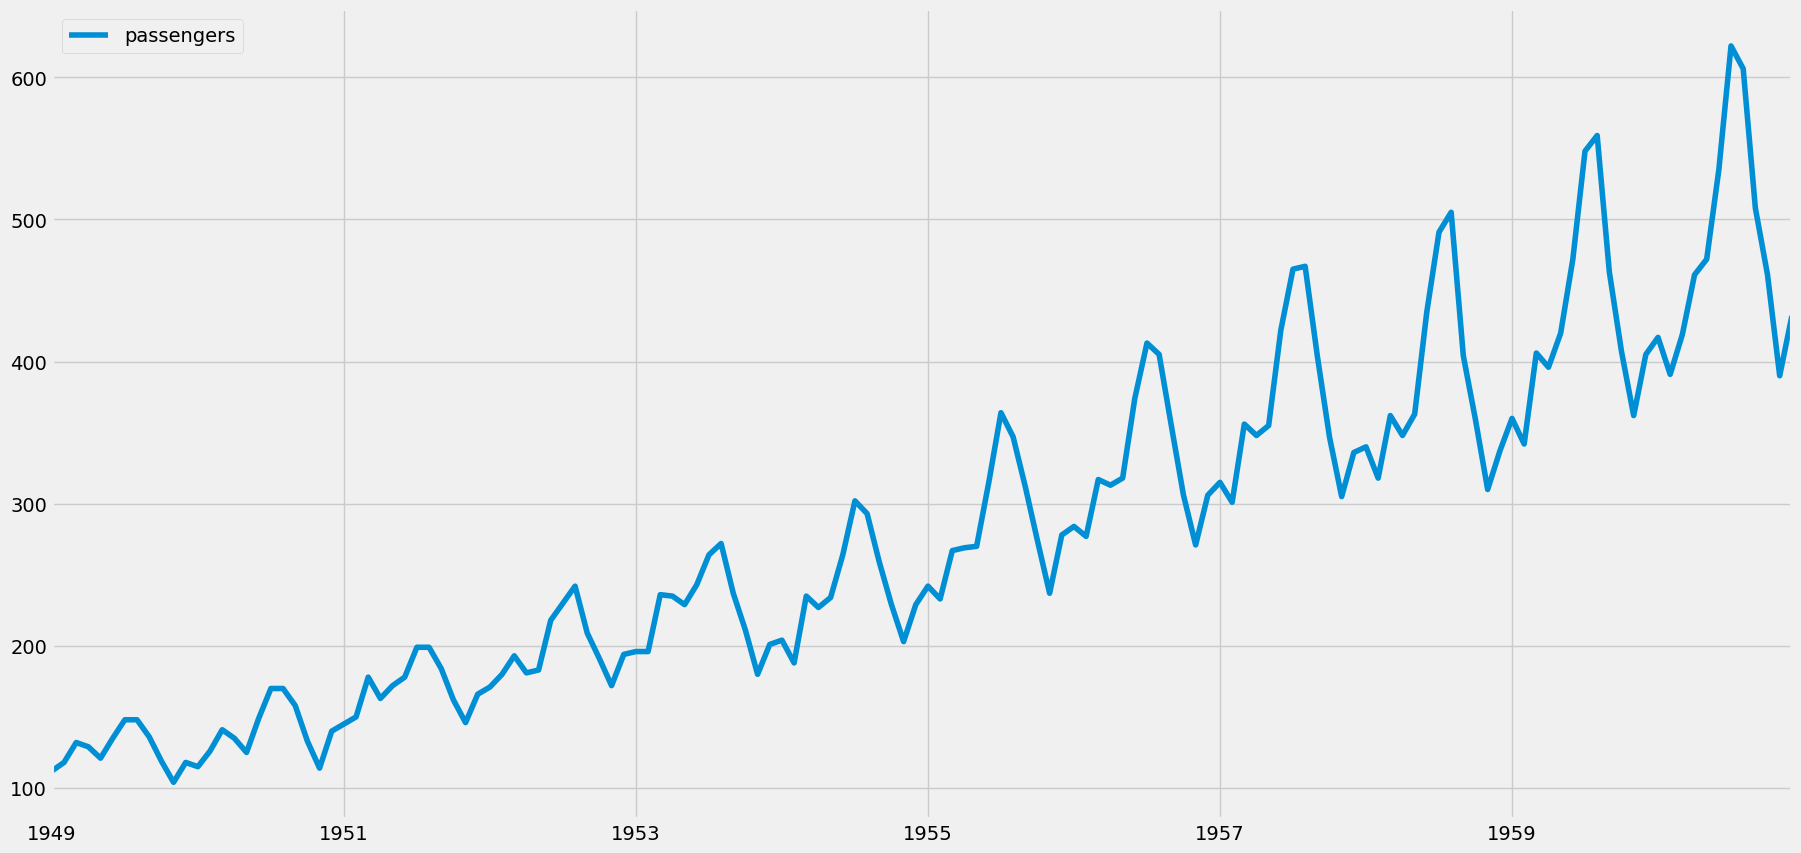

In [36]:
# Passengers dataset
series = pd.read_csv(CFG.data_folder + 'passengers.csv')
series['date'] = pd.to_datetime(series['date'])
series.set_index('date').plot(xlabel = "")


This code loads a time series dataset, converts the date column to datetime objects, sets the date as the index, and then plots the time series data. Let's break it down step-by-step:

**1. Loading the Dataset:**

*   `pd.read_csv(...)`: This uses the `read_csv()` function from the Pandas library to read data from a CSV (Comma Separated Values) file.
*   `CFG.data_folder + 'passengers.csv'`:  This constructs the full path to the CSV file. It combines the value of the `data_folder` attribute from the `CFG` class (which we defined earlier as `./data/`) with the filename `'passengers.csv'`. This assumes that the `passengers.csv` file is located in a folder named "data" within the current working directory.
*   `series = ...`: The loaded data is stored in a Pandas Series object called `series`.  A Pandas Series is a one-dimensional labeled array capable of holding any data type.

**2. Converting to Datetime:**

*   `series['date']`: This accesses the column named 'date' within the `series` DataFrame.  It assumes that your CSV file has a column labeled "date".
*   `pd.to_datetime(...)`: This uses the `to_datetime()` function from Pandas to convert the values in the 'date' column from strings (or other formats) into datetime objects. Datetime objects are essential for working with time series data because they allow you to perform operations like indexing by date, calculating differences between dates, and plotting time series correctly.
*   `series['date'] = ...`: The converted datetime values are then assigned back to the 'date' column in the `series` DataFrame, overwriting the original string values.

**3. Setting the Index:**

*   `series.set_index('date')`: This sets the 'date' column as the index of the Pandas Series (or DataFrame if it had multiple columns).  Setting the date as the index is crucial for time series analysis because it allows you to easily access and manipulate data based on dates.
*   `.plot()`: This calls the `plot()` method on the modified Series (with the 'date' column now serving as the index). The `plot()` method automatically creates a line plot of the time series data, with the date values along the x-axis and the corresponding passenger numbers (or whatever your data represents) along the y-axis.  Matplotlib is used behind the scenes to generate the plot.


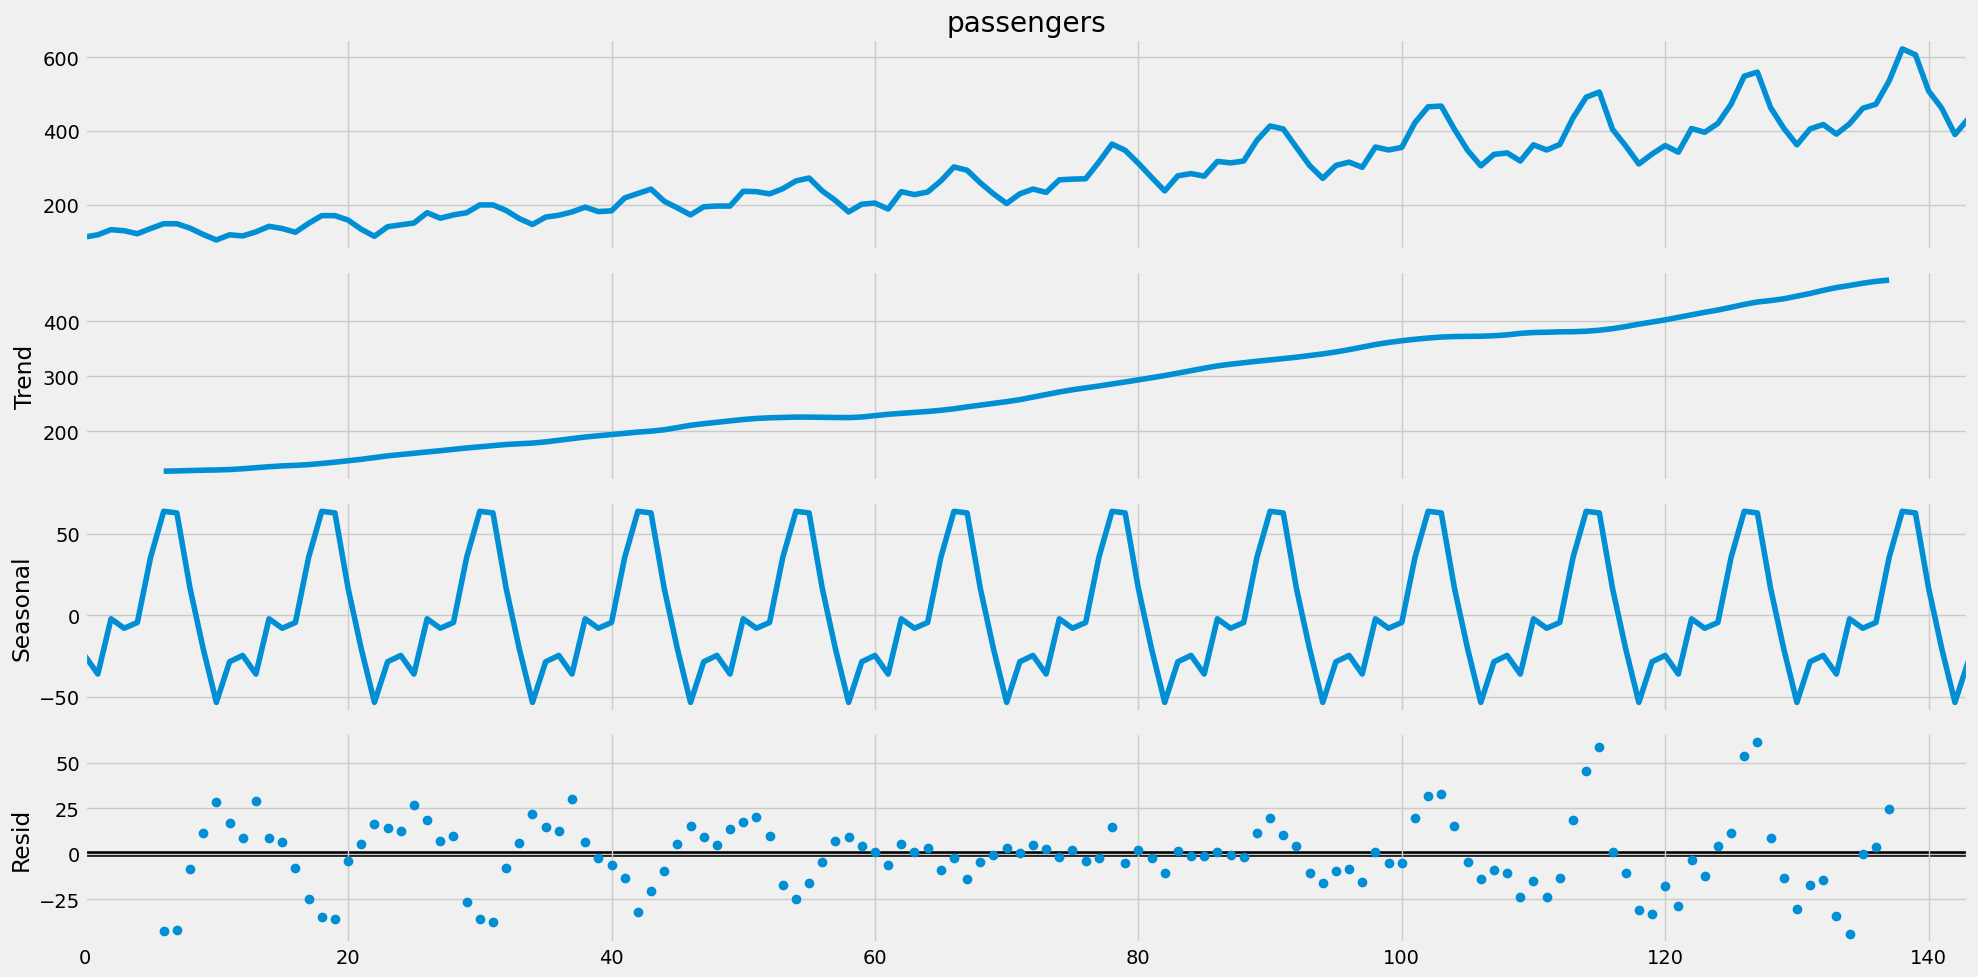

In [37]:
decomposition1 = seasonal_decompose(series["passengers"],period =12) 
figure = decomposition1.plot()
plt.show()

This code performs a seasonal decomposition of the "passengers" column from the `series` DataFrame and then visualizes the decomposed components (trend, seasonality, and residuals). 
**1. Seasonal Decomposition:**

*   `seasonal_decompose(...)`: This function from `statsmodels.tsa.seasonal` performs the seasonal decomposition of a time series. It separates the time series into its constituent components: trend, seasonality, and residuals (random noise).
*   `series["passengers"]`:  This specifies the time series data to be decomposed. It assumes that your DataFrame `series` has a column named "passengers" containing the passenger numbers 
*   `period=12`: This is a crucial parameter. It tells the function the length of the seasonal cycle in your data. In this case, `period=12` indicates that there's a yearly seasonality with 12 periods (months) within each year.  This is appropriate for monthly passenger data where you expect patterns to repeat every 12 months.
*   `decomposition1 = ...`: The result of the decomposition is stored in an object called `decomposition1`. This object contains the decomposed components: trend, seasonal, and residual.

**2. Plotting the Decomposition:**

*   `decomposition1.plot()`:  This calls the `plot()` method on the `decomposition1` object. This generates a plot with four subplots stacked vertically:
    *   **Original Series:** The original time series data ("passengers").
    *   **Trend Component:** Shows the long-term trend of the data, smoothing out seasonal fluctuations.
    *   **Seasonal Component:**  Displays the repeating seasonal pattern (e.g., monthly variations).
    *   **Residuals:** Represents the remaining random variation in the data after removing the trend and seasonality. These should ideally be randomly distributed with no discernible patterns.
*   `figure = ...`: The `plot()` method returns a Matplotlib figure object, which is assigned to the variable `figure`.  While not strictly necessary here (since we immediately show the plot), it allows you to further customize the plot if needed.
*   `plt.show()`: This displays the generated plot in a new window or inline (depending on your environment). Without this line, the plot would be created but not shown.

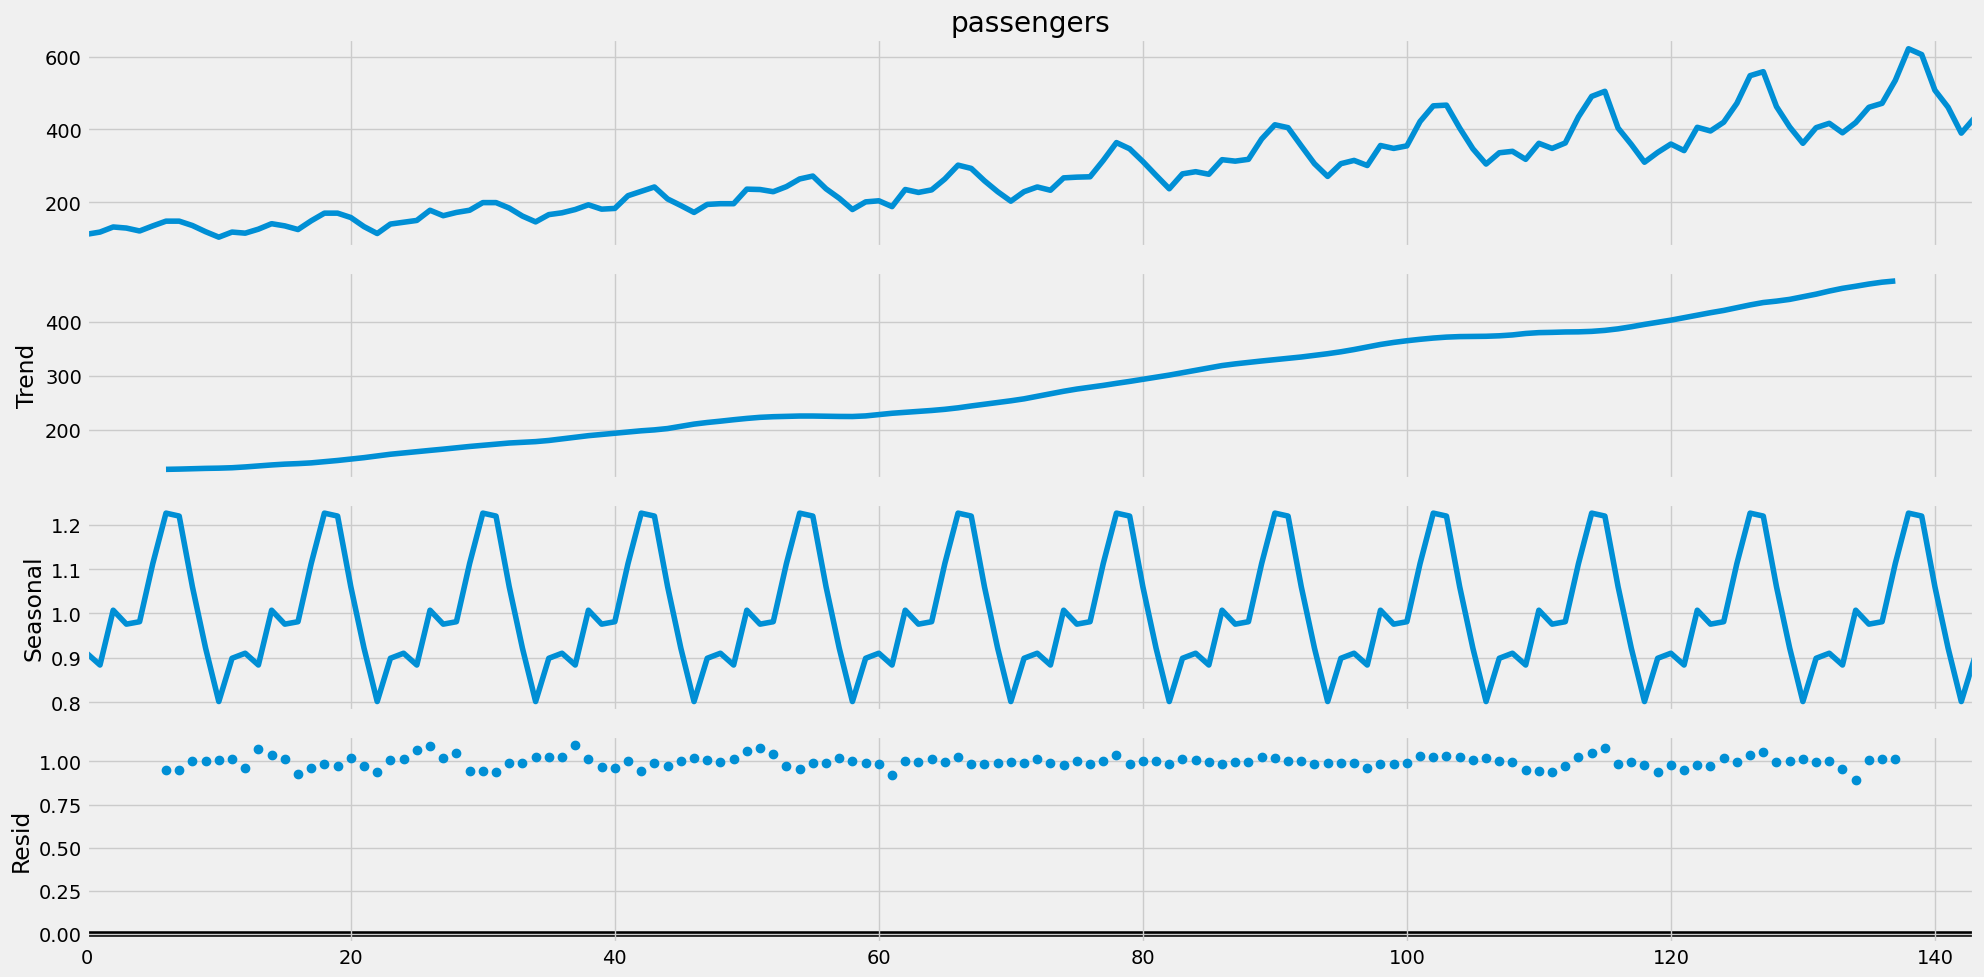

In [38]:
decomposition2 = seasonal_decompose(series["passengers"],period =12, model = 'multiplicative') 
figure = decomposition2.plot()
plt.show()

This code is very similar to the previous one, but it performs a *multiplicative* seasonal decomposition instead of the default additive decomposition. Let's break down the difference and what this means:

**1. Seasonal Decomposition (Multiplicative Model):**

*   `seasonal_decompose(...)`:  Again, this function from `statsmodels.tsa.seasonal` performs the seasonal decomposition of a time series.
*   `series["passengers"]`: Specifies the time series data (the "passengers" column).
*   `period=12`:  Indicates that there's a yearly seasonality with 12 periods (months).
*   `model='multiplicative'`: This is the key difference. It specifies that you want to use a *multiplicative* decomposition model instead of the default *additive* model.

**What's the difference between additive and multiplicative decomposition?**

*   **Additive Decomposition:** Assumes that the time series components (trend, seasonality, residuals) add up to form the original series:
    `Original Series = Trend + Seasonality + Residuals`
    This is appropriate when the magnitude of the seasonal fluctuations *doesn't change* with the level of the trend.  In other words, the seasonal variations are roughly constant over time.

*   **Multiplicative Decomposition:** Assumes that the components multiply together to form the original series:
    `Original Series = Trend * Seasonality * Residuals`
    This is appropriate when the magnitude of the seasonal fluctuations *increases or decreases* with the level of the trend.  For example, if passenger numbers are low in winter and high in summer, the absolute difference between winter and summer might be larger when overall passenger numbers are higher.

**2. Plotting the Decomposition:**

*   `decomposition2.plot()`: This generates a plot with four subplots stacked vertically, similar to before. However, because you're using a multiplicative model, the interpretation of the components is slightly different.  The seasonal component will now be expressed as a ratio relative to the trend rather than an absolute value.
*   `figure = ...`: The `plot()` method returns a Matplotlib figure object.
*   `plt.show()`: Displays the generated plot.

<Axes: >

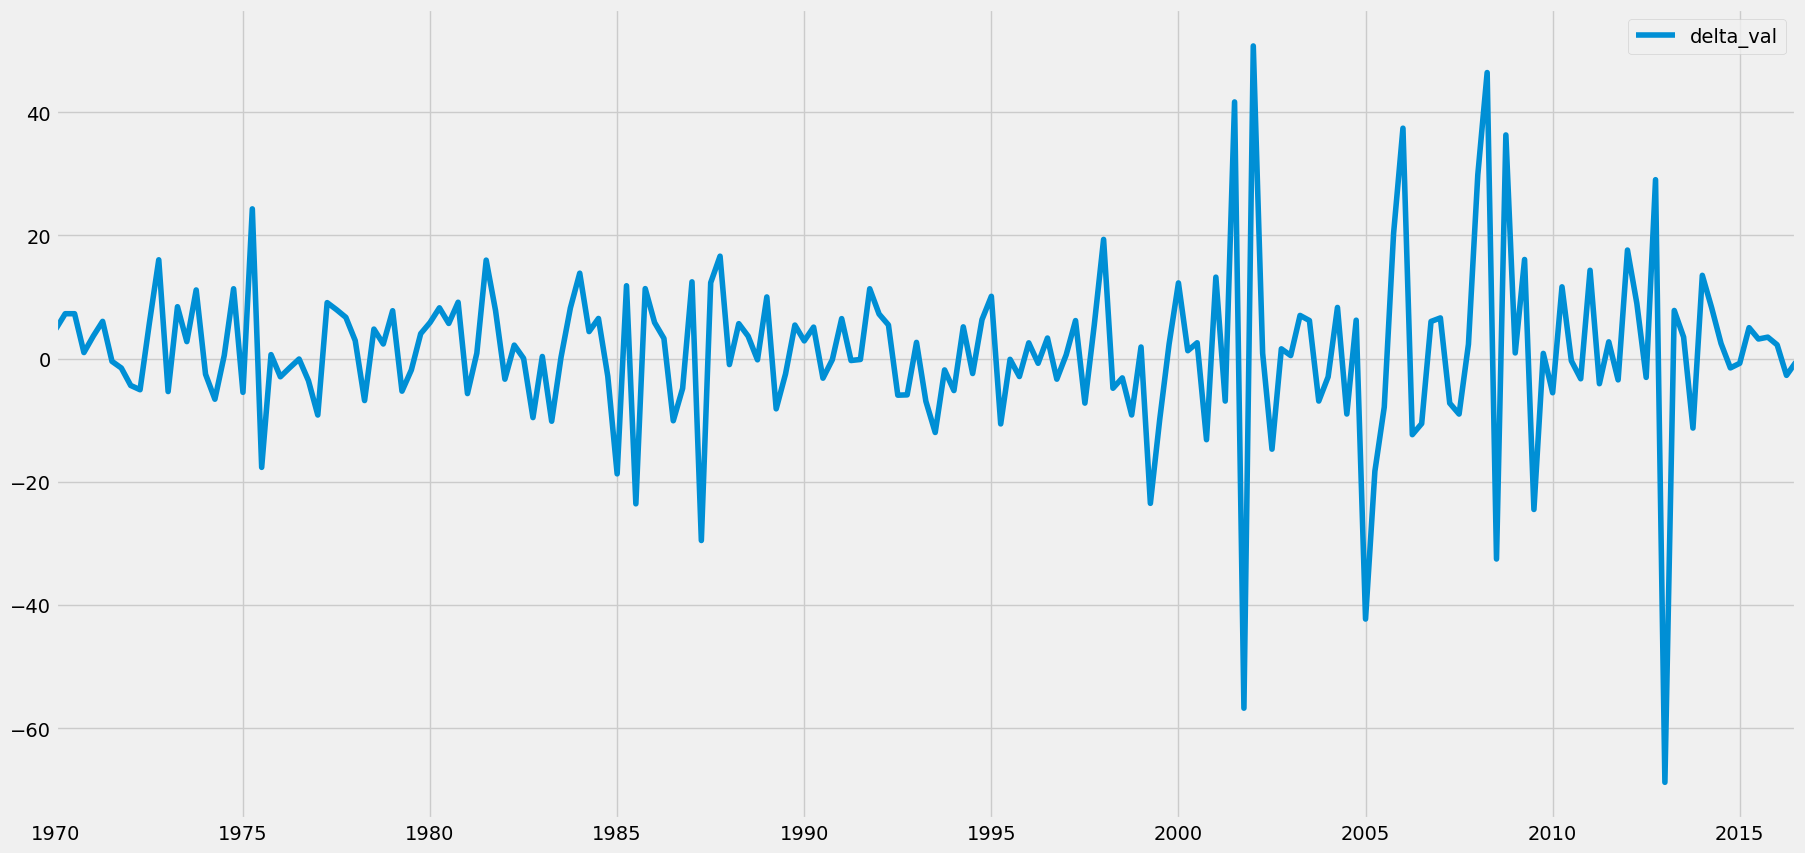

In [39]:
# Changes in level of savings in the US
series = pd.read_csv(CFG.data_folder + 'savings_change.csv')
series['date'] = pd.to_datetime(series['date'])
series.set_index('date').plot(xlabel = "")

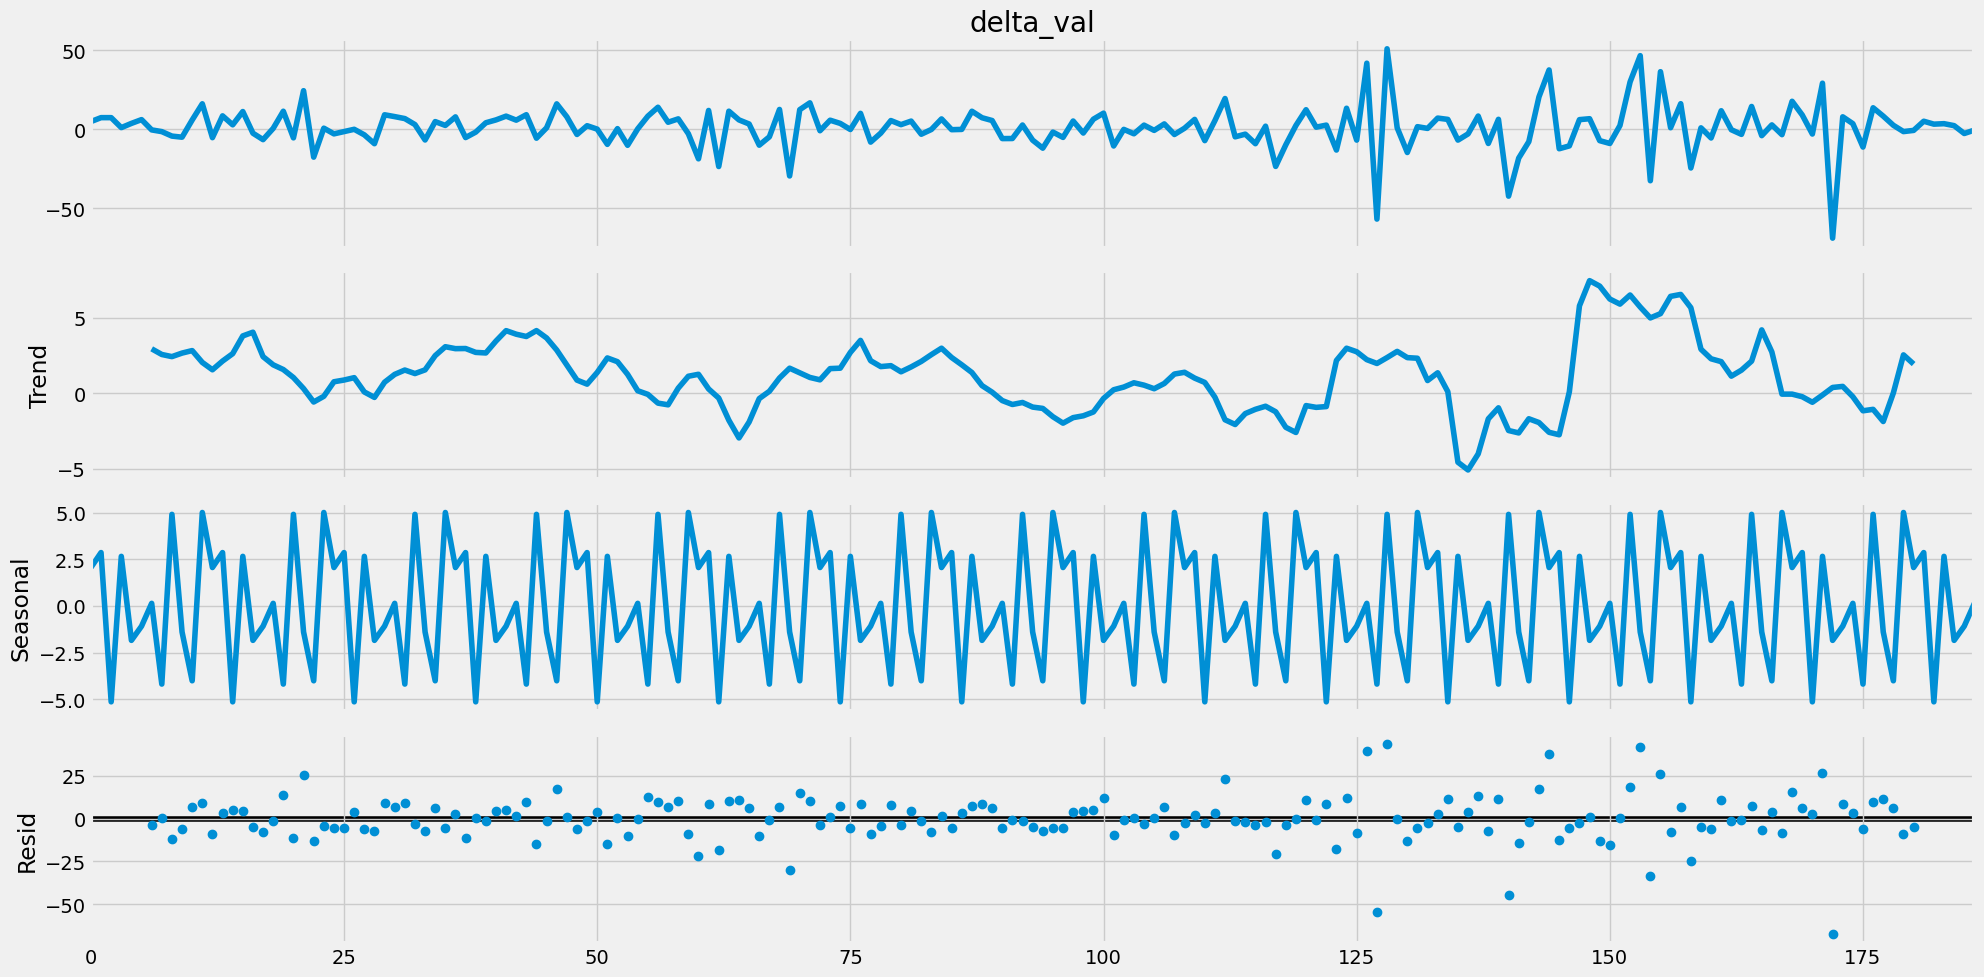

In [40]:
decomposition3 = seasonal_decompose(series["delta_val"],period =12) 
figure = decomposition3.plot()
plt.show()

<Axes: >

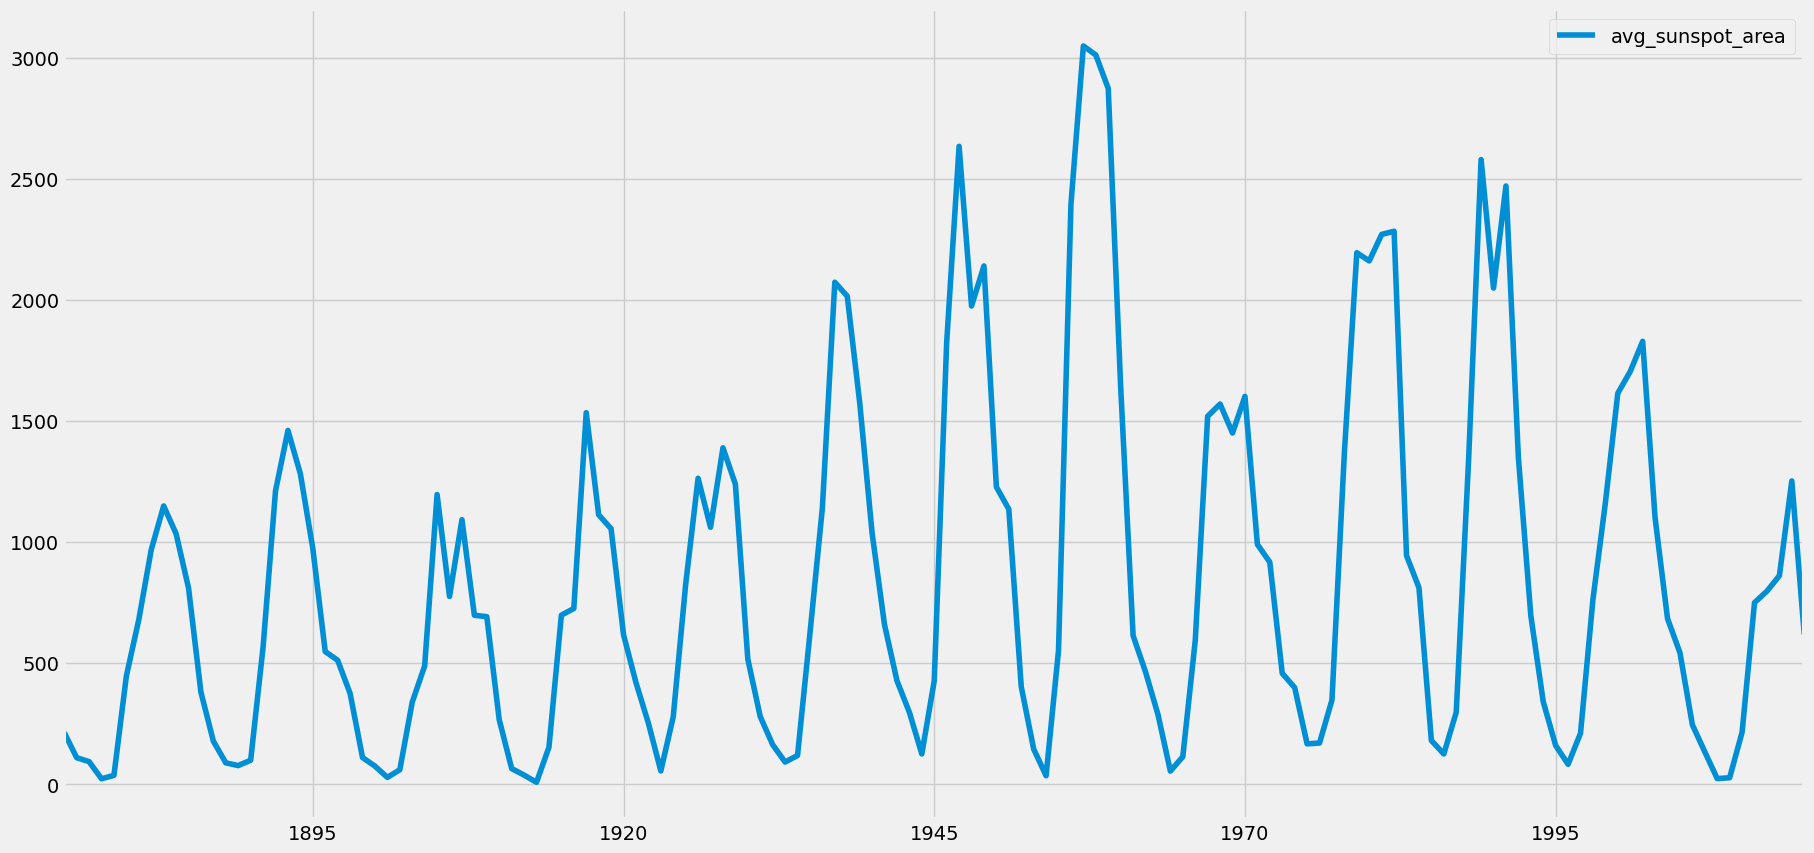

In [41]:
# Sunspots dataset
series = pd.read_csv(CFG.data_folder + 'sunspots.csv')
series['date'] = pd.to_datetime(series['date'])
series.set_index('date').plot(xlabel = "")


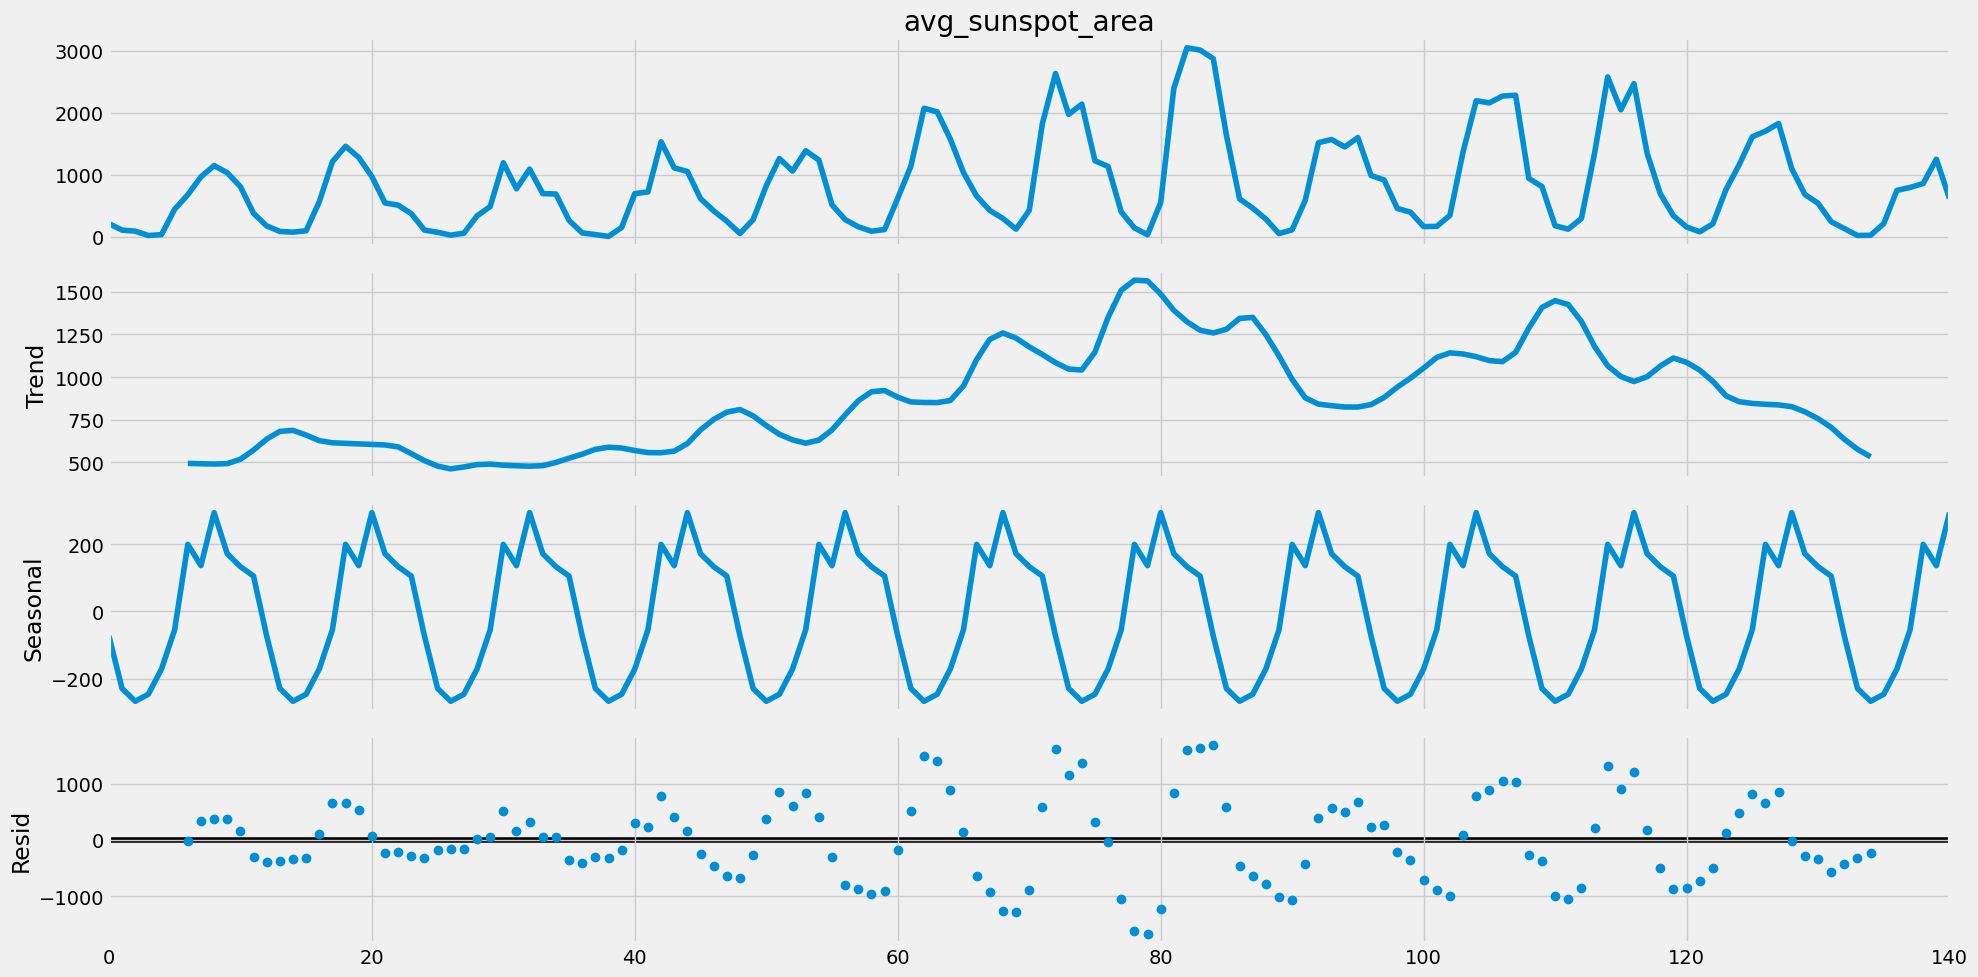

In [42]:
decomposition = seasonal_decompose(series["avg_sunspot_area"],period =12) 
figure = decomposition.plot()
plt.show()

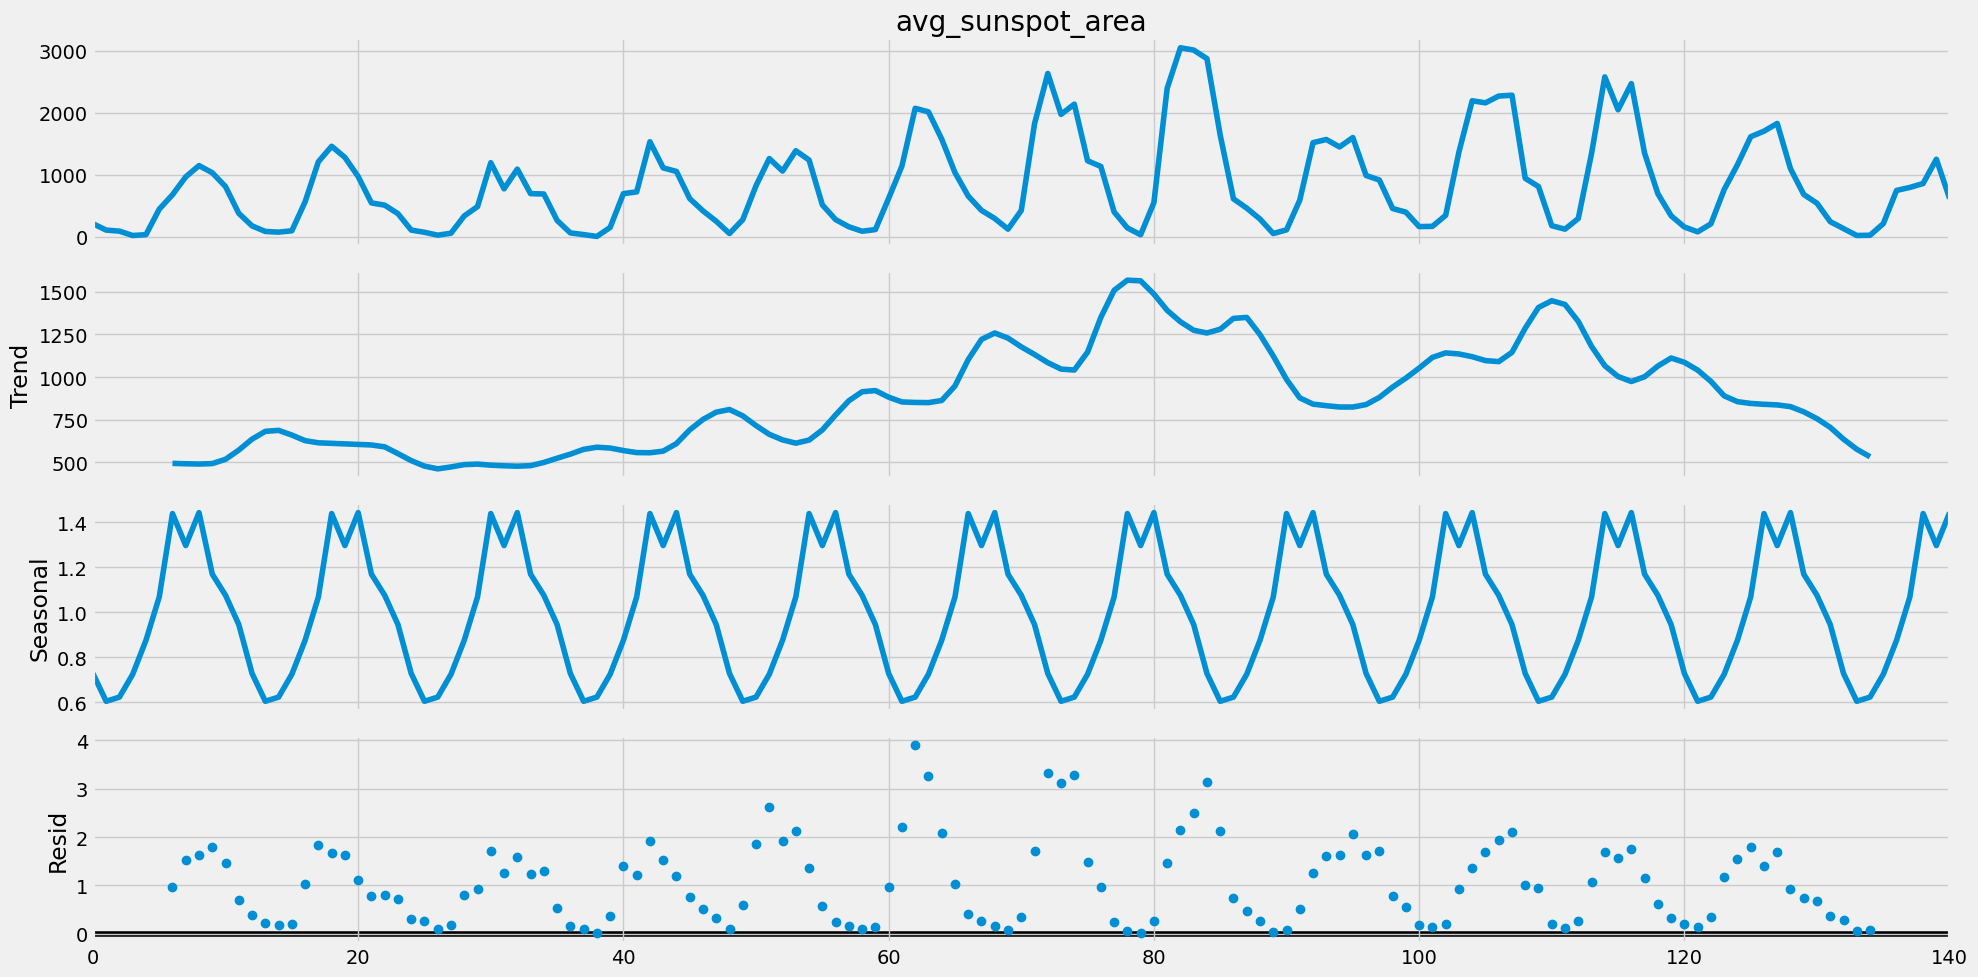

In [43]:
decomposition = seasonal_decompose(series["avg_sunspot_area"],period =12, model = 'multiplicative') 
figure = decomposition.plot()
plt.show()

# Dependence

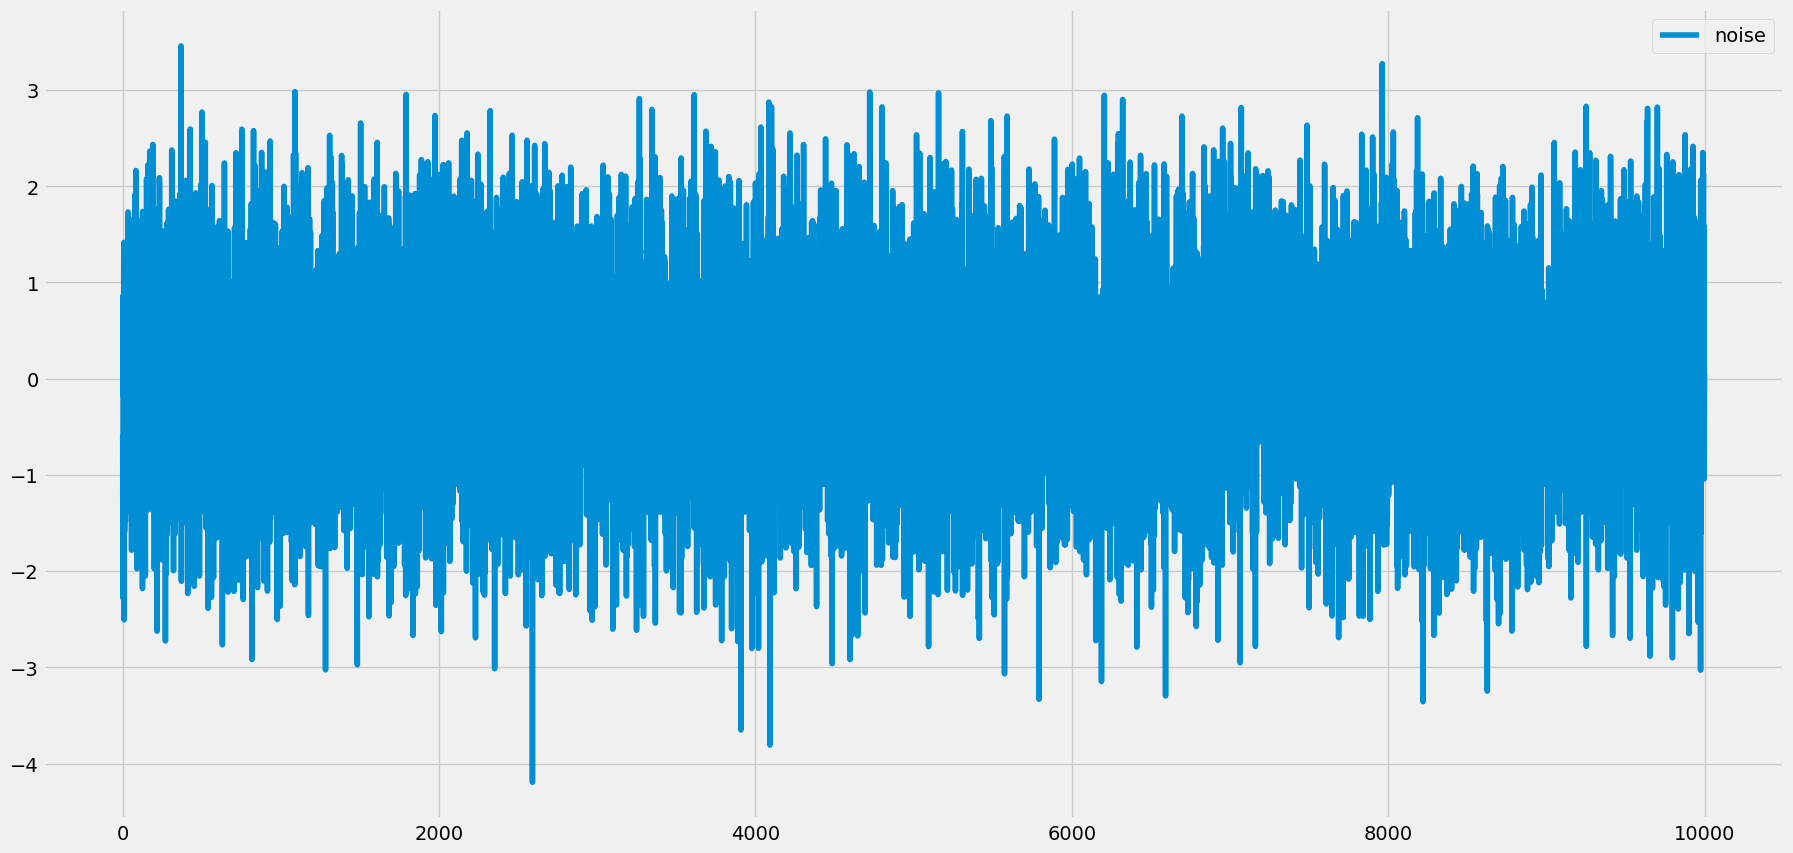

In [44]:
xseries = pd.DataFrame(data = np.random.normal(0, 1, 10000), columns = ['noise'] )
xseries.plot()
print()

This block generates a Pandas DataFrame containing random noise and then plots it as a time series. Let's break down each part:

**1. Generating Random Data:**

*   `np.random.normal(0, 1, 10000)`: This uses the `normal()` function from NumPy's `random` module to generate an array of 10k random numbers drawn from a normal (Gaussian) distribution.
    *   `0`:  The mean (average) of the normal distribution is set to 0.
    *   `1`: The standard deviation of the normal distribution is set to 1. This controls how spread out the data will be.
    *   `10000`: Specifies that you want to generate 10,000 random numbers.
*   `pd.DataFrame(data=..., columns=['noise'])`:  This creates a Pandas DataFrame from the generated NumPy array.
    *   `data=...`: The `data` argument specifies the data for the DataFrame (the array of random numbers).
    *   `columns=['noise']`: This assigns the name "noise" to the single column in the DataFrame.

**2. Plotting the Data:**

*   `xseries.plot()`:  This calls the `plot()` method on the `xseries` DataFrame. Since the DataFrame has only one column ("noise"), Matplotlib will create a line plot of that column's values against their index (which is implicitly 0 to 9999). This results in a plot showing random fluctuations around zero.

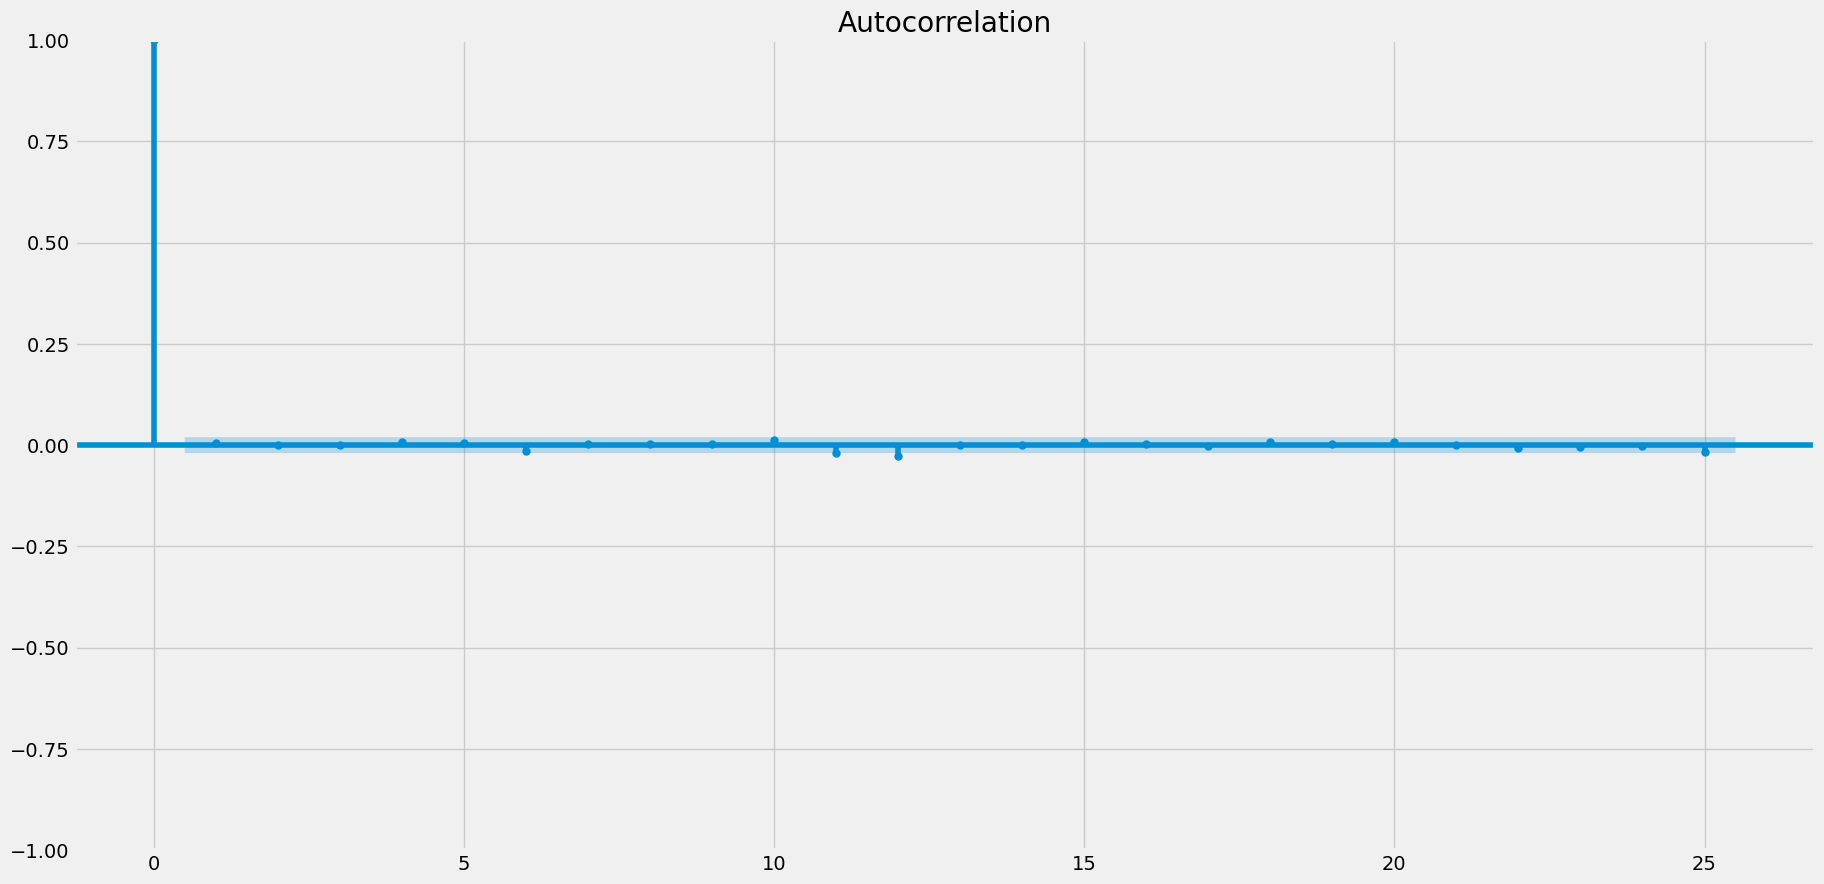

In [45]:
plot_acf(xseries['noise'], lags = 25)
print()

This code snippet calculates and plots the Autocorrelation Function (ACF) of the 'noise' column in your `xseries` DataFrame, up to a lag of 25. Let's break it down:

*   `plot_acf(...)`: This function from `statsmodels.graphics.tsaplots` generates a plot of the Autocorrelation Function (ACF). The ACF measures the correlation between a time series and its lagged values.  In other words, it tells you how much past values of the series influence current values.
*   `xseries['noise']`: This specifies the time series data for which to calculate the ACF. It accesses the 'noise' column from your `xseries` DataFrame (which contains the random noise we generated earlier).
*   `lags=25`:  This parameter determines how many lags to include in the ACF plot. A lag of *k* means calculating the correlation between the time series and a version of itself shifted by *k* time steps. Setting `lags=25` will show correlations for lags 1, 2, 3, ..., up to 25.


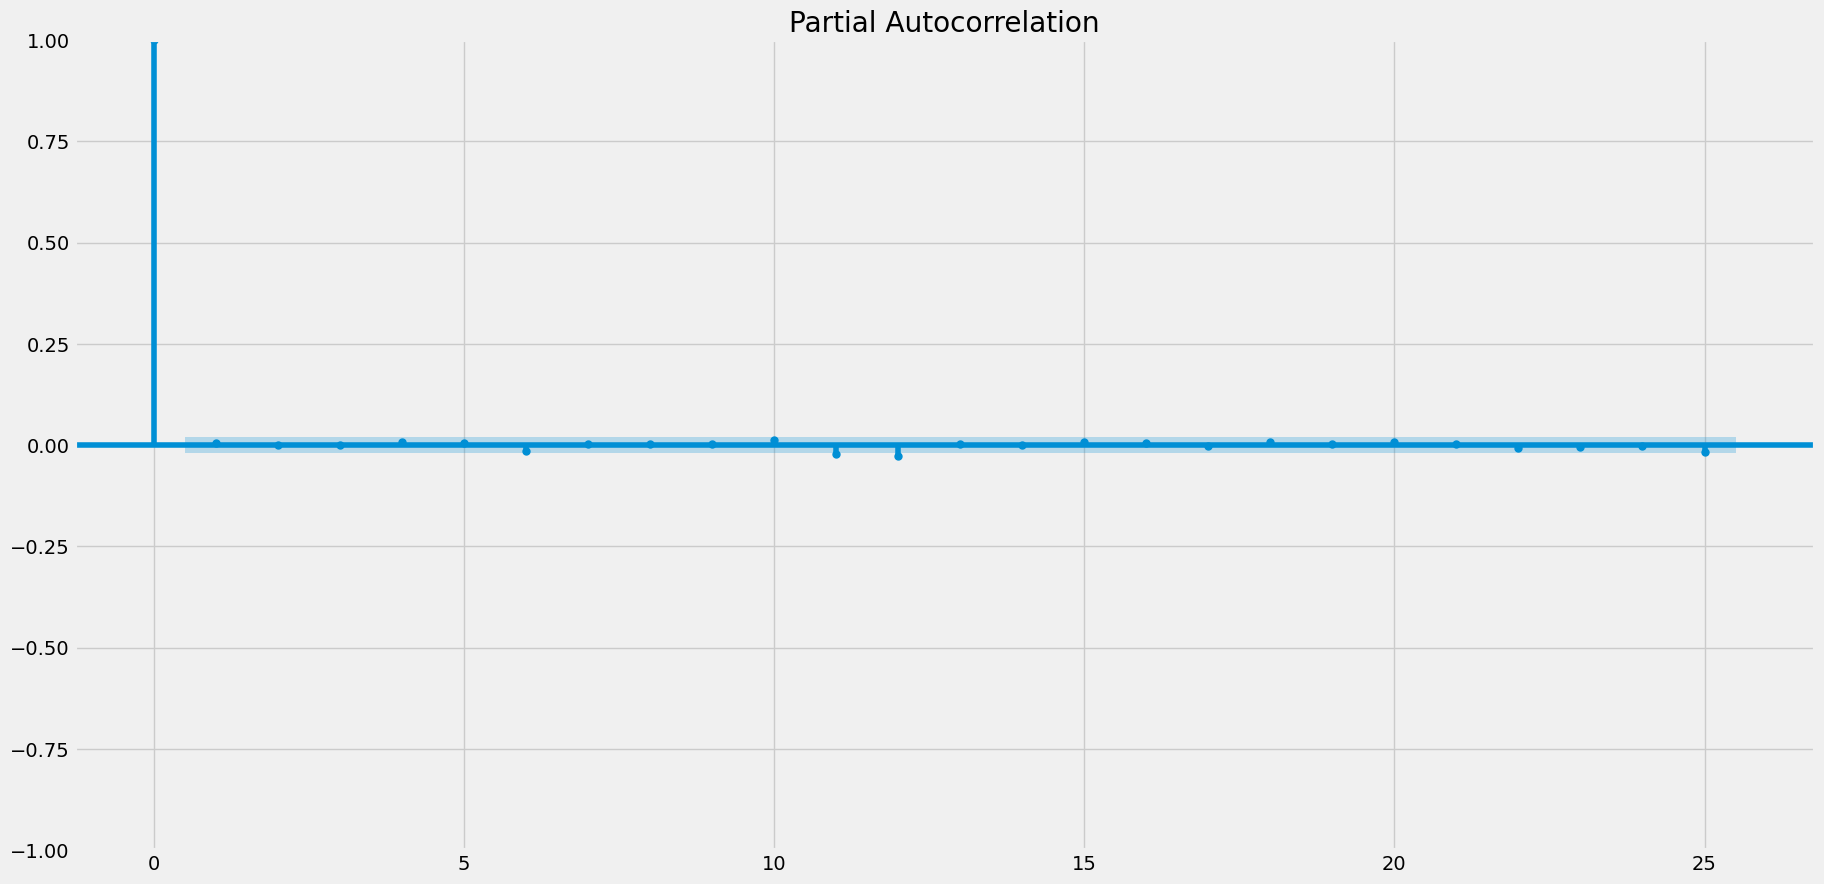

In [46]:
plot_pacf(xseries['noise'], lags = 25)
print()

This code calculates and plots the Partial Autocorrelation Function (PACF) of the 'noise' column in the `xseries` DataFrame, up to a lag of 25: 

*   `plot_pacf(...)`: This function from `statsmodels.graphics.tsaplots` generates a plot of the Partial Autocorrelation Function (PACF). The PACF measures the correlation between a time series and its lagged values, *after removing the effects of intermediate lags*.  This helps identify direct relationships between observations at different points in time.
*   `xseries['noise']`: This specifies the time series data for which to calculate the PACF – the 'noise' column from your `xseries` DataFrame (the random noise).
*   `lags=25`:  This parameter determines how many lags to include in the PACF plot. A lag of *k* means calculating the correlation between the time series and a version of itself shifted by *k* time steps, while controlling for the influence of lags 1 through k-1.


<Axes: xlabel='date'>

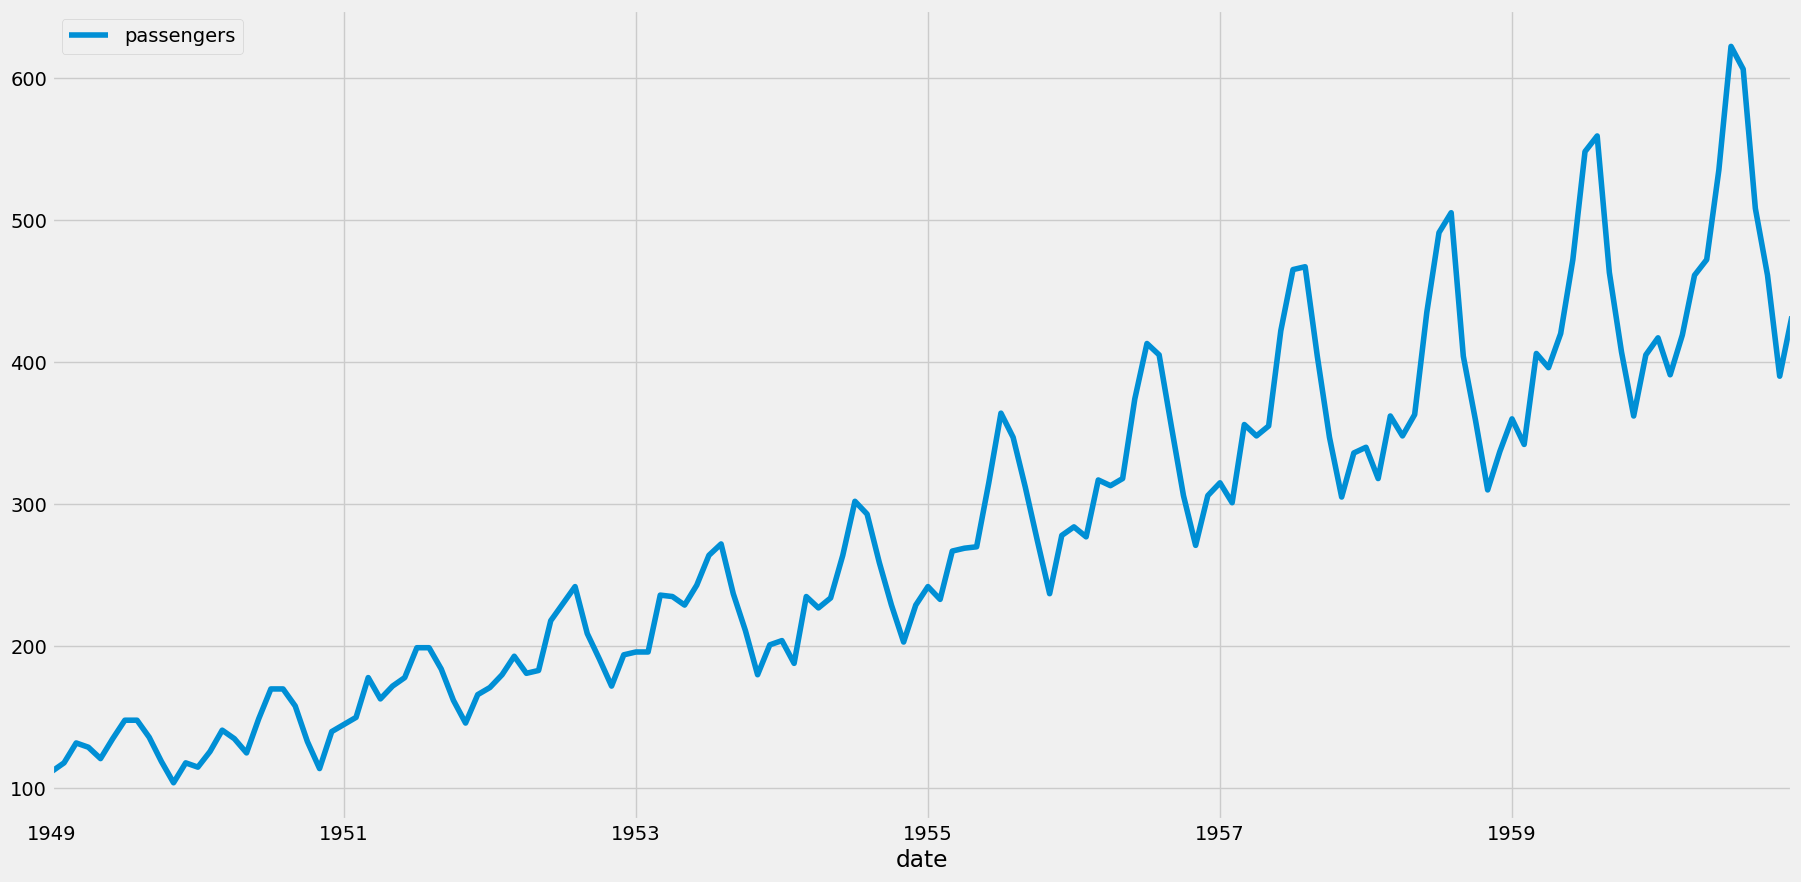

In [47]:
# Non-stationary example
series = pd.read_csv(CFG.data_folder + 'passengers.csv')
series['date'] = pd.to_datetime(series['date'])
series.set_index('date').plot()

<Axes: ylabel='Frequency'>

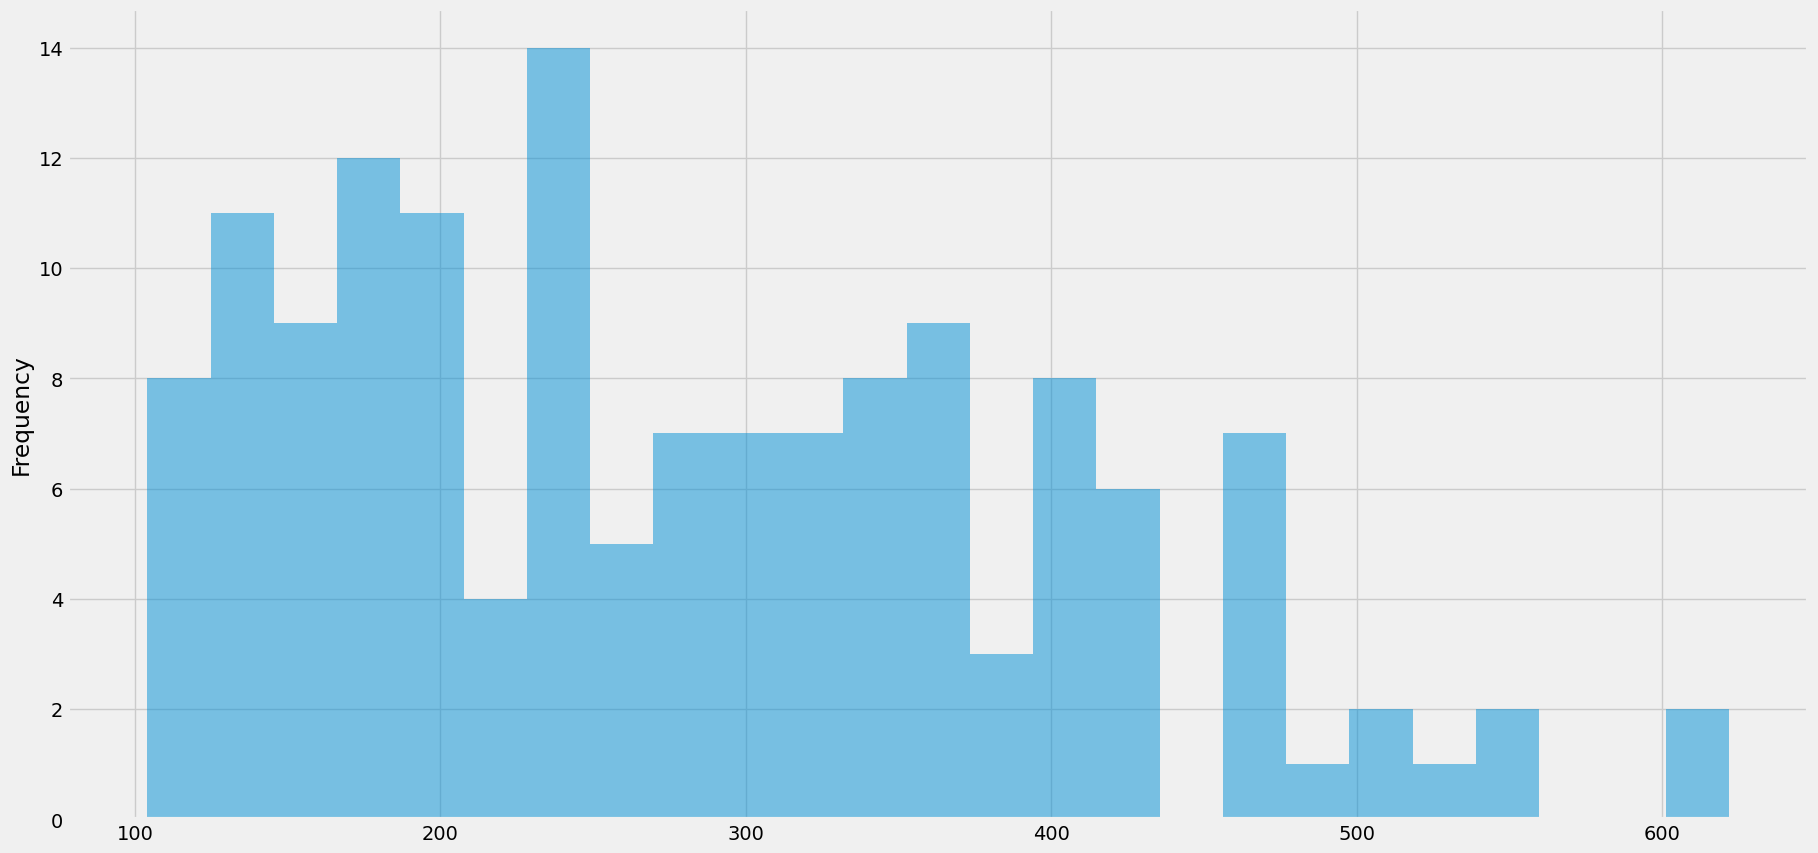

In [48]:
series = pd.read_csv(CFG.data_folder + 'passengers.csv')
series['date'] = pd.to_datetime(series['date'])
series['passengers'].plot.hist(bins=25, alpha=0.5)


In [49]:
X = series.passengers.values
split =  int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean:')
print('chunk1: %.2f vs chunk2: %.2f' % (mean1, mean2))
print('variance:')
print('chunk1: %.2f vs chunk2: %.2f' % (var1, var2))

mean:
chunk1: 182.90 vs chunk2: 377.69
variance:
chunk1: 2244.09 vs chunk2: 7367.96


This code divides the 'passengers' time series data into two chunks and then calculates and prints the means and variances of each chunk. This is a a way to check for potential non-stationarity or changes in distribution within a time series.  
**1. Extracting Data:**

*   `series.passengers`:  This accesses the 'passengers' column from your `series` DataFrame.
*   `.values`: This extracts the values from the 'passengers' column as a NumPy array and assigns it to the variable `X`. Using a NumPy array is often more efficient for numerical operations than using a Pandas Series directly.

**2. Splitting the Data:**

*   `split = int(len(X) / 2)`: This calculates the midpoint of the `X` array and converts it to an integer.  This determines where to split the data into two chunks.
*   `X1, X2 = X[0:split], X[split:]`: This splits the NumPy array `X` into two sub-arrays:
    *   `X1`: Contains the first half of the data (from index 0 up to, but not including, `split`).
    *   `X2`: Contains the second half of the data (from index `split` to the end).

**3. Calculating Means:**

*   `X1.mean()`: Calculates the arithmetic mean (average) of the values in the `X1` array.
*   `X2.mean()`: Calculates the arithmetic mean of the values in the `X2` array.
*   `mean1, mean2 = ...`: Assigns the calculated means to the variables `mean1` and `mean2`, respectively.

**4. Calculating Variances:**

*   `X1.var()`: Calculates the variance of the values in the `X1` array. Variance measures how spread out the data is around its mean.
*   `X2.var()`: Calculates the variance of the values in the `X2` array.
*   `var1, var2 = ...`: Assigns the calculated variances to the variables `var1` and `var2`, respectively.

**5. Printing Results:**

*   These lines print the calculated means and variances for each chunk in a formatted way.  The `%.2f` format specifier ensures that the numbers are printed as floating-point values with two decimal places.


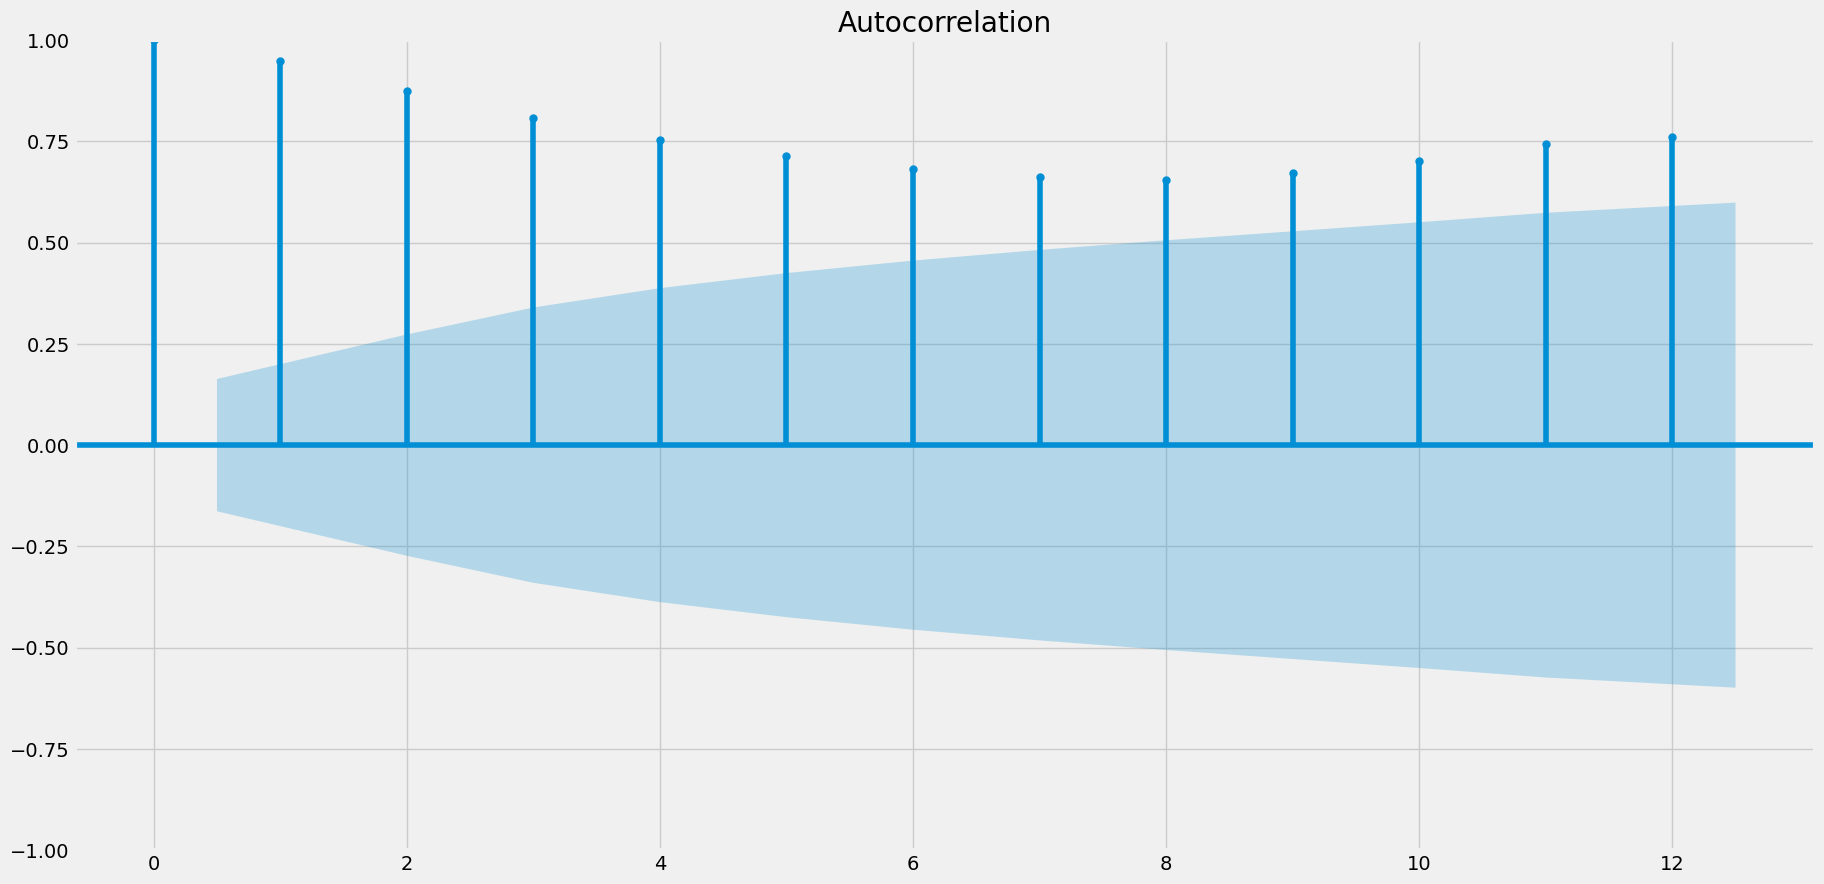

In [50]:
plot_acf(X, lags = 12)
plt.show()

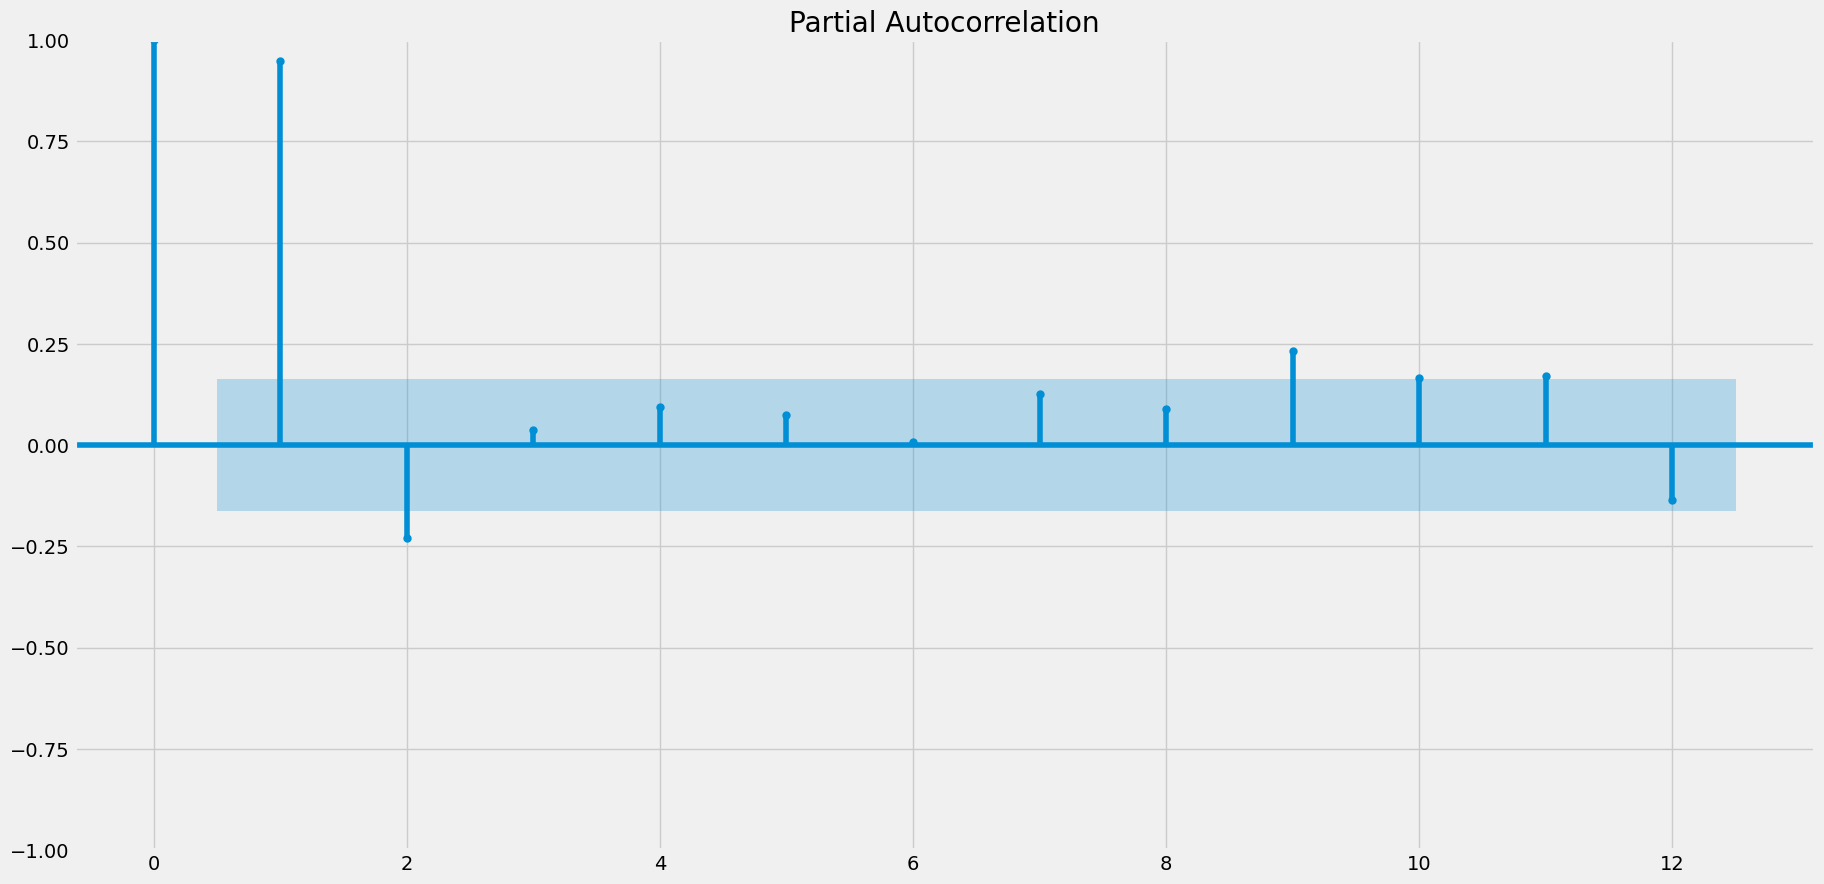

In [51]:
plot_pacf(X, lags = 12)
plt.show()

In [52]:
decomposition = seasonal_decompose(X, model='additive', period =12)

In [53]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


This code snippet performs the Augmented Dickey-Fuller (ADF) test on the entire 'passengers' time series data (`X`) and then prints the results. It’s a continuation of the previous steps aimed at assessing the stationarity of the time series. Let's break it down:

**1. Performing the ADF Test:**

*   `adfuller(X)`: This calls the `adfuller()` function from `statsmodels.tsa.stattools`. It takes the time series data (`X`, which is a NumPy array in this case) as input and performs the ADF test to determine if the series is stationary. The function returns a tuple containing various statistics related to the test.

**2. Printing the Results:**

*   `print('ADF Statistic: %f' % result[0])`: Prints the ADF statistic (the test statistic). `result[0]` accesses the first element of the `result` tuple. The `%f` format specifier ensures that the value is printed as a floating-point number.
*   `print('p-value: %f' % result[1])`: Prints the p-value associated with the ADF test. `result[1]` accesses the second element of the `result` tuple. The `%f` format specifier ensures that the value is printed as a floating-point number.
*   `print('Critical Values:')`: Prints a header for the critical values section.
*   `for key, value in result[4].items():`: This loop iterates through the dictionary of critical values returned by the ADF test. `result[4]` accesses the fifth element of the `result` tuple, which is a dictionary containing critical values at different significance levels (e.g., 1%, 5%, 10%).
*   `print('\t%s: %.3f' % (key, value))`: Inside the loop, this line prints each critical value along with its corresponding significance level (`key`). The `\t` adds a tab for indentation, and the `%.3f` format specifier ensures that the values are printed as floating-point numbers with three decimal places.


In [54]:
# skip the start of the series: adfuller does not handle missing values which appear for values within the first full period
result = adfuller(decomposition.trend[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.025948
p-value: 0.994532


In [55]:
result = adfuller(decomposition.seasonal[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -592063499685779.000000
p-value: 0.000000


In [56]:
result = adfuller(decomposition.resid[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.029170
p-value: 0.000019


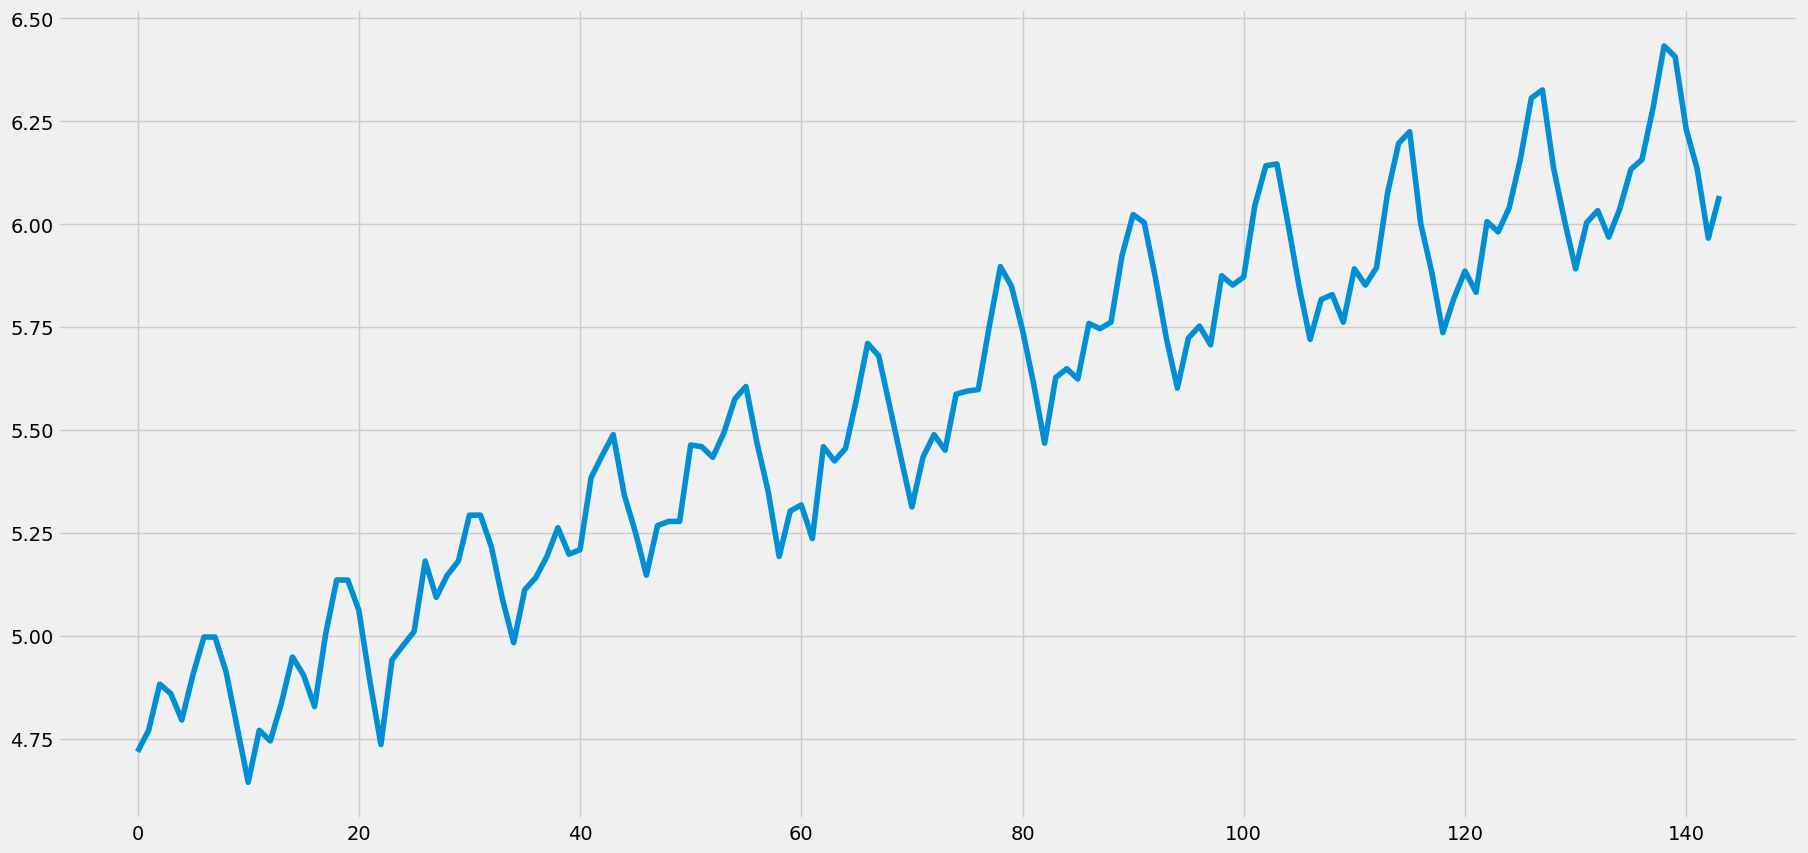

In [57]:
# log transform
series['passengers2'] = np.log(series['passengers'])
series.passengers2.plot()
plt.show()

In [58]:
result = adfuller(series.passengers2)
print('p-value: %f' % result[1])

p-value: 0.422367


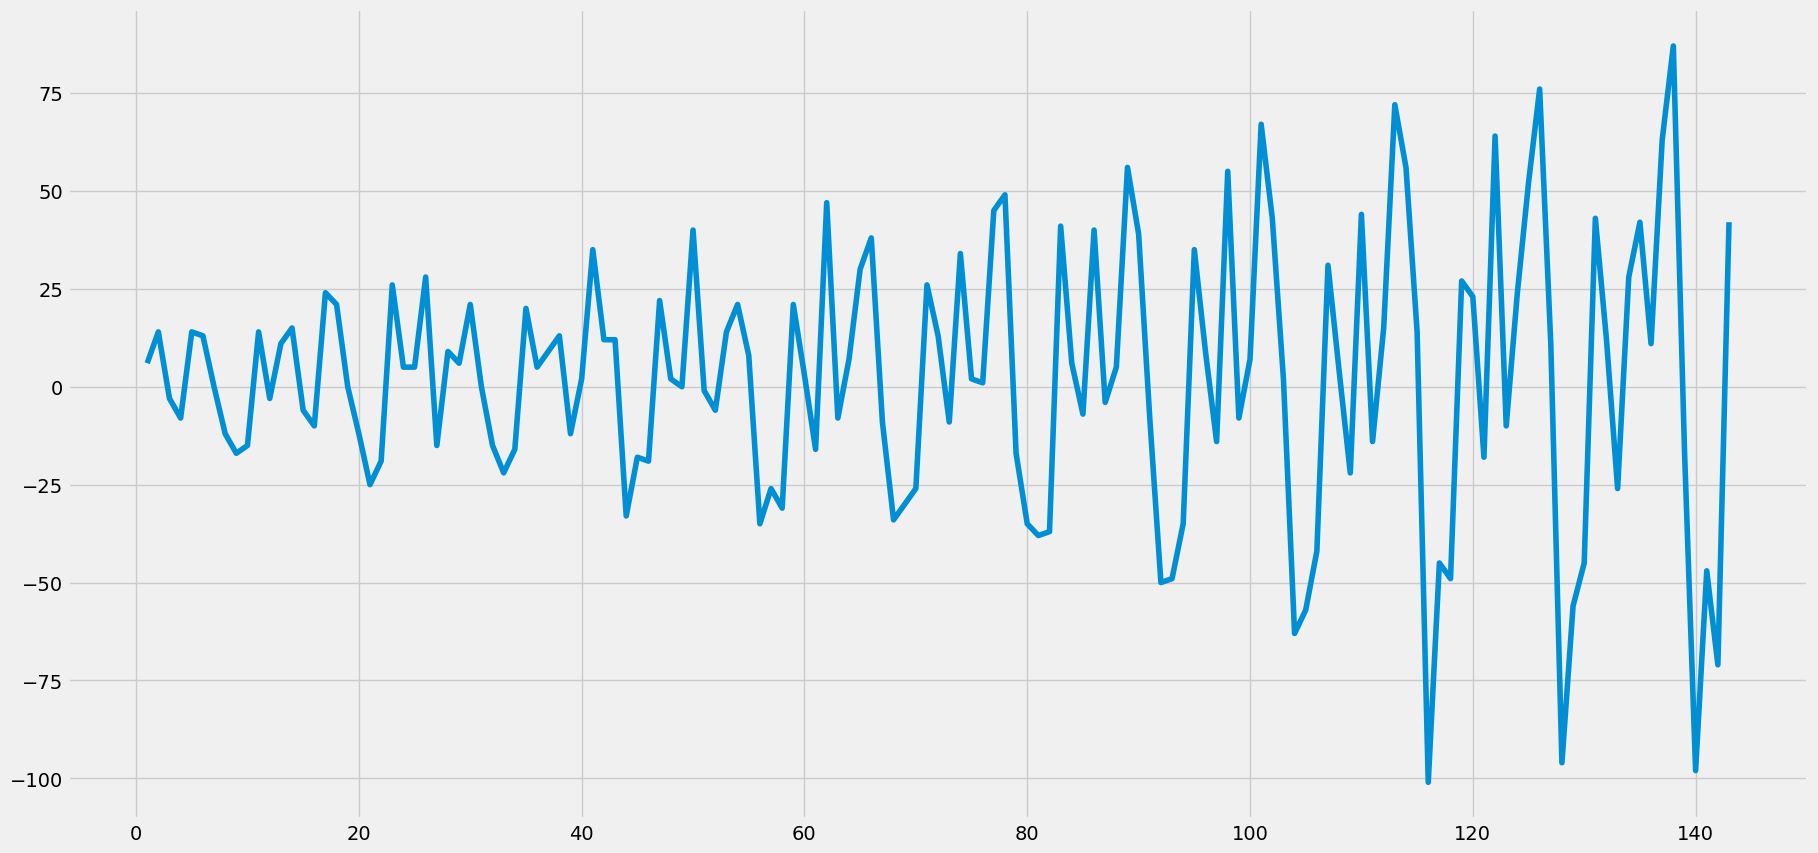

In [59]:
# differencing
series['passengers3'] = series['passengers'].diff()
series.passengers3.plot()
plt.show()

In [60]:
result = adfuller(series.passengers3[10:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.830154
p-value: 0.054094


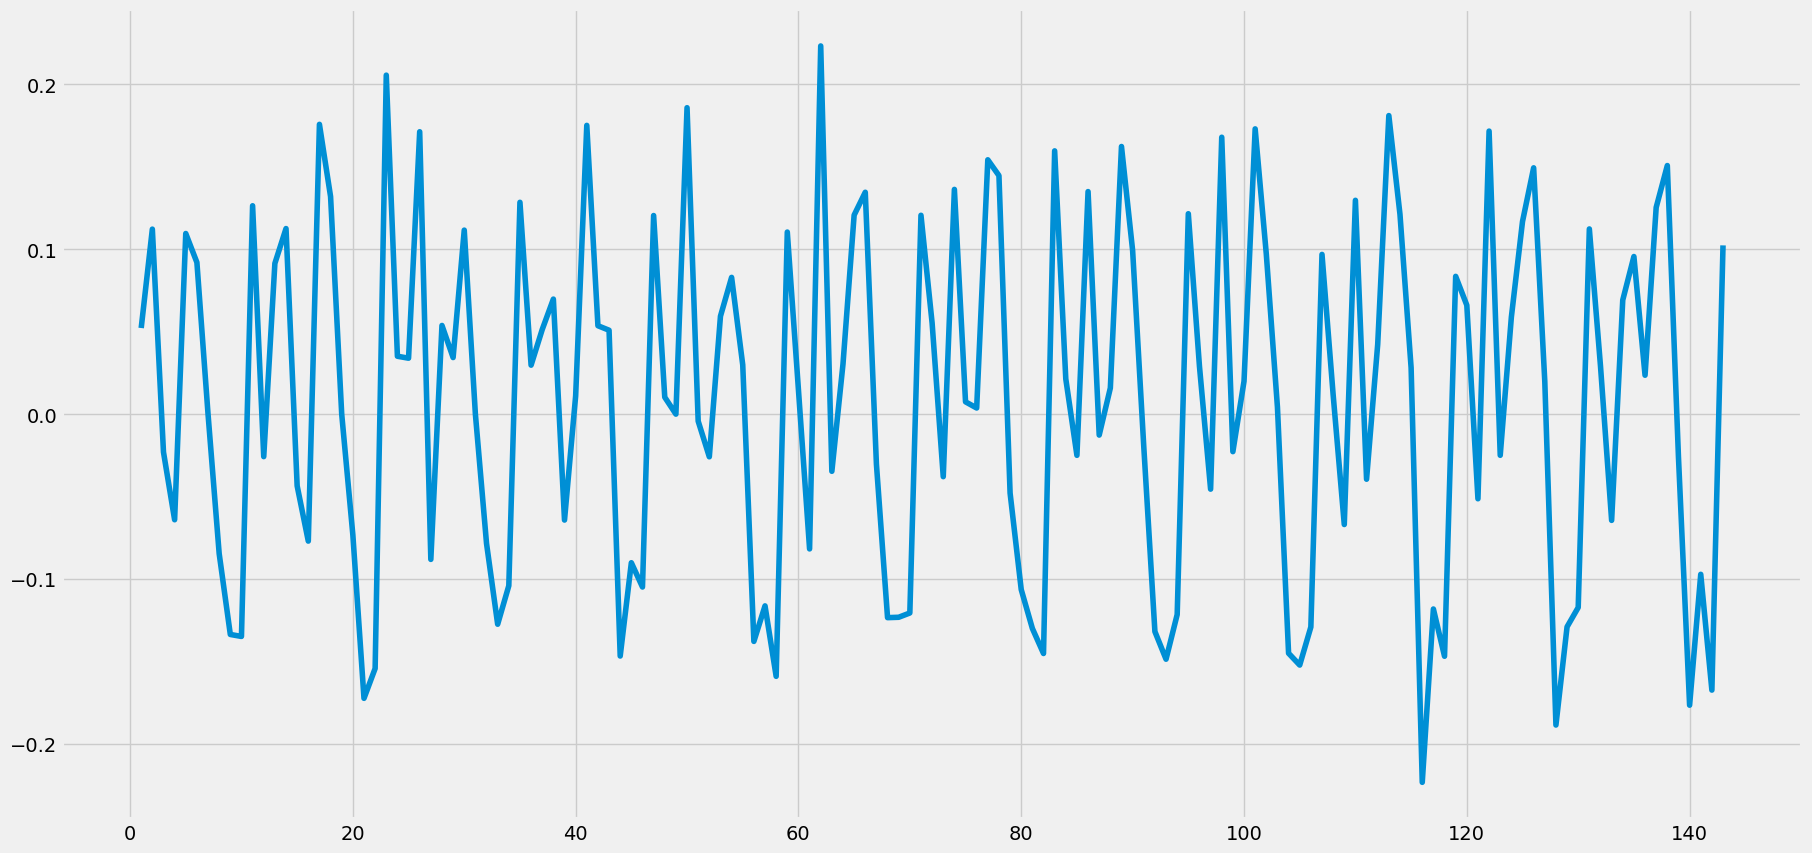

In [61]:
# log + differencing
series['passengers4'] = series['passengers'].apply(np.log).diff()
series.passengers4.plot()
plt.show()

In [62]:
result = adfuller(series.passengers4[10:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.086110
p-value: 0.027598


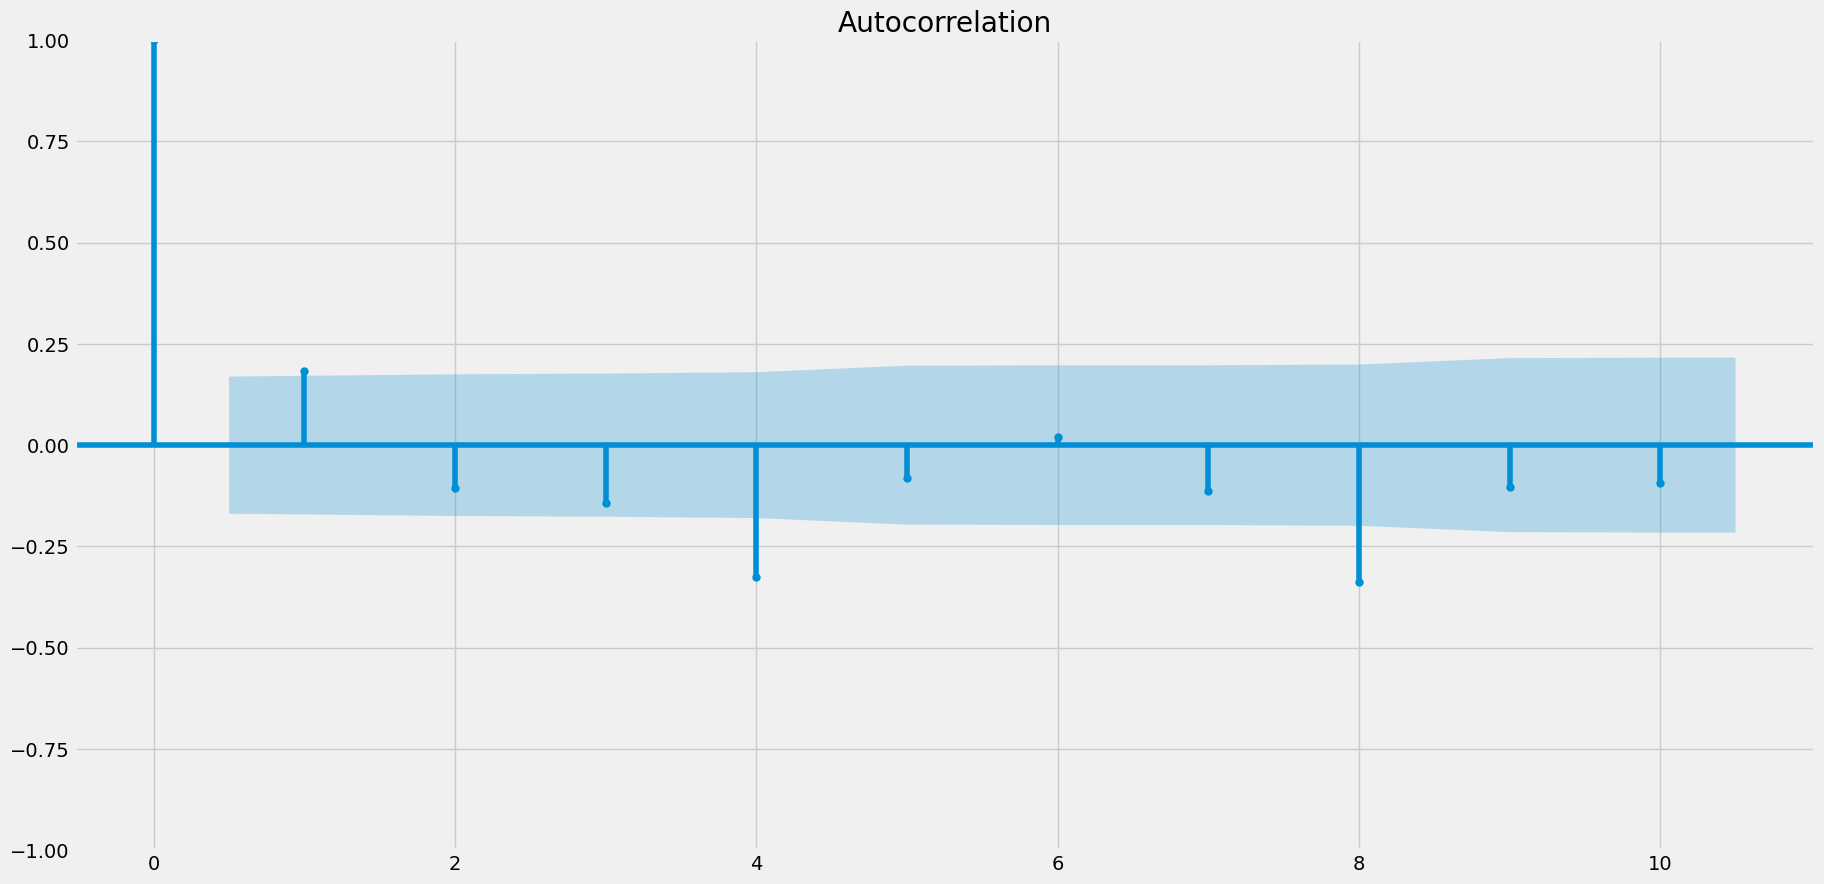

In [63]:
plot_acf(series['passengers4'][10:], lags = 10)
plt.show()

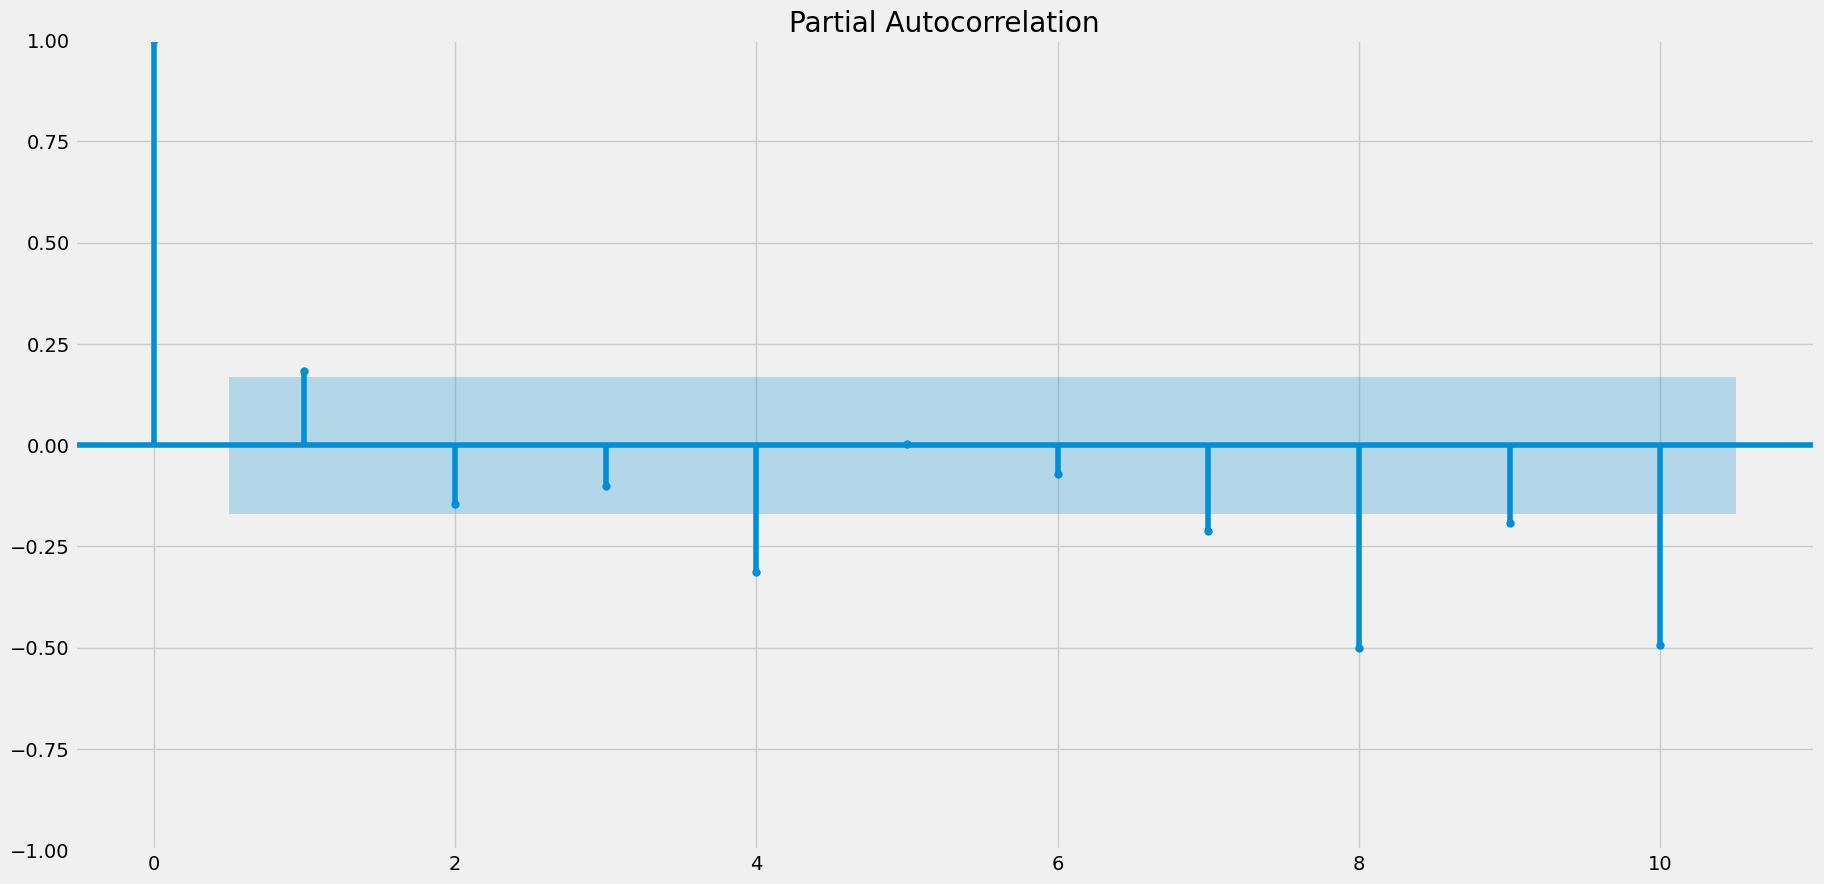

In [64]:
plot_pacf(series['passengers4'][10:], lags = 10)
plt.show()